# FIFA 20 CLUSTERING

**MADE BY TEAM ID: PTID-CDS-JUL22-1339**

**PROJECT ID: PRCP-1004-Fifa20**

## BUSINESS CASE - Using clustering algorithms to categorize similar players using their traits and their different skills in the field.

Pipline of this Model Building :-
- Problem Defination
* Domain analysis
* Basic checks
* EDA
* DATA preprocessing
* Model creation for h1n1 vaccine
* Feature selection
* Model selection
* Hyperparameter tuning
* Model Evaluation
* Model creation for seasonal vaccine
* Feature selection
* Model selection
* Hyperparameter tuning
* Model Evaluation
* Conclusion

# 1] PROBLEM DEFINATION
- Using clustering algorithms to categorize similar players using their traits and their different skills in the field.

# IMPORTING NECESSORY MODULES

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [24]:
data = pd.read_csv('E:/Data mites/INTERNSHIP DETAILS/PRCP-1004-Fifa20/Data/players_20.csv')

In [27]:
pd.set_option('display.max_columns', None)

In [4]:
data

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         190871  https://sofifa.com/player/190871/neymar-da-sil...   
3         200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4         183277  https://sofifa.com/player/183277/eden-hazard/2...   
...          ...                                                ...   
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

              short_name                            long_name  age  \
0               L. Messi       Lionel Andrés Messi Cuccittini   32   
1      Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34   
2              Neymar Jr        Neymar da Silva Santos Junior   27   
3               J. Oblak                            Jan Oblak   26   
4              E. Hazard                          Eden Hazard   28   
...                  ...                                  ...  ...   
18273         Shao Shuai                                   邵帅   22   
18274       Xiao Mingjie                         Mingjie Xiao   22   
18275          Zhang Wei                                   张威   19   
18276       Wang Haijian                                  汪海健   18   
18277         Pan Ximing                                  潘喜明   26   

              dob  height_cm  weight_kg nationality  \
0      1987-06-24        170         72   Argentina   
1      1985-02-05        187         83    Portugal   
2      1992-02-05        175         68      Brazil   
3      1993-01-07        188         87    Slovenia   
4      1991-01-07        175         74     Belgium   
...           ...        ...        ...         ...   
18273  1997-03-10        186         79    China PR   
18274  1997-01-01        177         66    China PR   
18275  2000-05-16        186         75    China PR   
18276  2000-08-02        185         74    China PR   
18277  1993-01-11        182         78    China PR   

                                club  overall  potential  value_eur  wage_eur  \
0                       FC Barcelona       94         94   95500000    565000   
1                           Juventus       93         93   58500000    405000   
2                Paris Saint-Germain       92         92  105500000    290000   
3                    Atlético Madrid       91         93   77500000    125000   
4                        Real Madrid       91         91   90000000    470000   
...                              ...      ...        ...        ...       ...   
18273               Beijing Renhe FC       48         56      40000      2000   
18274               Shanghai SIPG FC       48         56      40000      2000   
18275         Hebei China Fortune FC       48         56      40000      1000   
18276  Shanghai Greenland Shenhua FC       48         54      40000      1000   
18277         Hebei China Fortune FC       48         51      40000      2000   

      player_positions preferred_foot  international_reputation  weak_foot  \
0           RW, CF, ST           Left                         5          4   
1               ST, LW          Right                         5          4   
2              LW, CAM          Right                         5          5   
3                   GK          Right                         3          3   
4               LW, CF          Right                         4          4   
...                ...            ...                       ...        ...   
18273               CB          Right                         1          3   
18274               CB          Right                  

# 2] DOMAIN ANALYSIS

- **Short_Name** - Small name of player
- **L_Name** - Full name of player
- **age** - Age of player
- **dob** - Date of birth of player
- **height_cm** - Height of player in centimeter
- **weight_kg** - Weight of player in kilograms
- **nationality** - Name of player's nation,with nationality
- **club** - Name of club for which player is representing
- **player position** - player position on pich
- **RW** - Right winger,**CF** - Center forward, **ST** - Striker , **LW** - left winger,      **CAM** - Central attacking midfielder, **GK** - Goalkeeper, **CB** - Corner Back, **CM** - Cemtral midfielder
- **Preferred foot** - Preferred foot for player
- **International Reputation** - International reputation in range of 1 to 5
- **weak foot** - weak foot in range of 1 to 5
- **val eur** - Valuation of player in Euros.
- **wages eur** - Wage of player in Euros
- **skill moves** - skill moves in range of 1 to 5
- **body type** - Whether the player is lean or normal.
- **team position** - Position of player on ground in team.
- **jersey no.** - Jersey no. of player.
- **joined date** - Joining date of player in team.








# 3] BASIC CHECKS

In [4]:
data.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         Na

In [5]:
data.tail()

sofifa_id                                         player_url  \
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

         short_name     long_name  age         dob  height_cm  weight_kg  \
18273    Shao Shuai            邵帅   22  1997-03-10        186         79   
18274  Xiao Mingjie  Mingjie Xiao   22  1997-01-01        177         66   
18275     Zhang Wei            张威   19  2000-05-16        186         75   
18276  Wang Haijian           汪海健   18  2000-08-02        185         74   
18277    Pan Ximing           潘喜明   26  1993-01-11        182         78   

      nationality                           club  overall  potential  \
18273    China PR               Beijing Renhe FC       48         56   
18274    China PR               Shanghai SIPG FC       48         56   
18275    China PR         Hebei China Fortune FC       48         56   
18276    China PR  Shanghai Greenland Shenhua FC       48         54   
18277    China PR         Hebei China Fortune FC       48         51   

       value_eur  wage_eur player_positions preferred_foot  \
18273      40000      2000               CB          Right   
18274      40000      2000               CB          Right   
18275      40000      1000               CM          Right   
18276      40000      1000               CM          Right   
18277      40000      2000               CM          Right   

       international_reputation  weak_foot  skill_moves      work_rate  \
18273                         1          3            2    Medium/High   
18274                         1          2            2  Medium/Medium   
18275                         1          2            2     Low/Medium   
18276                         1          2            2        Low/Low   
18277                         1          3            2  Medium/Medium   

      body_type real_face  release_clause_eur player_tags team_position  \
18273    Normal        No             70000.0         NaN           RES   
18274    Normal        No             72000.0         NaN           SUB   
18275      Lean        No             70000.0         NaN           SUB   
18276      Lean        No             70000.0         NaN           SUB   
18277    Normal        No                 NaN         NaN           SUB   

       team_jersey_number      loaned_from      joined  contract_valid_until  \
18273                36.0              NaN  2018-07-13                2019.0   
18274                31.0              NaN  2019-02-01                2022.0   
18275                38.0              NaN  2019-01-01                2019.0   
18276                33.0              NaN  2019-02-01                2022.0   
18277                37.0  Tianjin TEDA FC         NaN                2019.0   

      nation_position  nation_jersey_number  pace  shooting  passing  \
18273             NaN                   NaN  57.0      23.0     28.0   
18274             NaN                   NaN  58.0      24.0     33.0   
18275             NaN                   NaN  54.0      35.0     44.0   
18276             NaN                   NaN  59.0      35.0     47.0   
18277             NaN                   NaN  60.0      32.0     51.0   

       dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
18273       33.0       47.0    51.0        NaN          NaN         NaN   
18274       35.0       48.0    48.0        NaN          NaN         NaN   
18275       45.0       48.0    51.0        NaN          NaN         NaN   
18276       47.0       45.0    52.0        NaN          NaN         NaN   
18277       45.0       47.0    55.0        NaN          NaN         NaN   

       gk_reflexes  gk_speed  gk_positioning player_trai

In [6]:
data.describe()

sofifa_id           age     height_cm     weight_kg       overall  \
count   18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean   219738.864482     25.283291    181.362184     75.276343     66.244994   
std     27960.200461      4.656964      6.756961      7.047744      6.949953   
min       768.000000     16.000000    156.000000     50.000000     48.000000   
25%    204445.500000     22.000000    177.000000     70.000000     62.000000   
50%    226165.000000     25.000000    181.000000     75.000000     66.000000   
75%    240795.750000     29.000000    186.000000     80.000000     71.000000   
max    252905.000000     42.000000    205.000000    110.000000     94.000000   

          potential     value_eur       wage_eur  international_reputation  \
count  18278.000000  1.827800e+04   18278.000000              18278.000000   
mean      71.546887  2.484038e+06    9456.942773                  1.103184   
std        6.139669  5.585481e+06   21351.714095                  0.378861   
min       49.000000  0.000000e+00       0.000000                  1.000000   
25%       67.000000  3.250000e+05    1000.000000                  1.000000   
50%       71.000000  7.000000e+05    3000.000000                  1.000000   
75%       75.000000  2.100000e+06    8000.000000                  1.000000   
max       95.000000  1.055000e+08  565000.000000                  5.000000   

          weak_foot   skill_moves  release_clause_eur  team_jersey_number  \
count  18278.000000  18278.000000        1.698000e+04        18038.000000   
mean       2.944250      2.368038        4.740717e+06           20.103892   
std        0.664656      0.765038        1.103002e+07           16.603639   
min        1.000000      1.000000        1.300000e+04            1.000000   
25%        3.000000      2.000000        5.630000e+05            9.000000   
50%        3.000000      2.000000        1.200000e+06           17.000000   
75%        3.000000      3.000000        3.700000e+06           27.000000   
max        5.000000      5.000000        1.958000e+08           99.000000   

       contract_valid_until  nation_jersey_number          pace      shooting  \
count          18038.000000           1126.000000  16242.000000  16242.000000   
mean            2021.114591             12.114565     67.700899     52.298301   
std                1.289888              6.735922     11.297656     14.029418   
min             2019.000000              1.000000     24.000000     15.000000   
25%             2020.000000              6.000000     61.000000     42.000000   
50%             2021.000000             12.000000     69.000000     54.000000   
75%             2022.000000             18.000000     75.000000     63.000000   
max             2026.000000             30.000000     96.000000     93.000000   

            passing     dribbling     defending        physic    gk_diving  \
count  16242.000000  16242.000000  16242.000000  16242.000000  2036.000000   
mean      57.233777     62.531585     51.553503     64.876678    65.422397   
std       10.407844     10.284950     16.419528      9.760162     7.736278   
min       24.000000     23.000000     15.000000     27.000000    44.000000   
25%       50.000000     57.000000     36.000000     59.000000    60.000000   
50%       58.000000     64.000000     56.000000     66.000000    65.000000   
75%       64.000000     69.000000     65.000000     72.000000    70.000000   
max       92.000000     96.000000     90.000000     90.000000    90.000000   

       gk_handling   gk_kicking  gk_reflexes     gk_speed  gk_positioning  \
count  2036.000000  2036.000000  2036.000000  2036.000000     2036.000000   
mean     63.146365    61.832515    66.390472    37.798625       63.374754   
std       7.244023     7.510709     8.154062    10.634038        8.447876   
min      42.000000    35.000000    45.000000    12.000000       41.000000   
25%      58.000000    57.000000    60.750000    29.000000       58.000000  

In [7]:
data.describe(include='O')

player_url    short_name  \
count                                               18278         18278   
unique                                              18278         17354   
top     https://sofifa.com/player/158023/lionel-messi/...  J. Rodríguez   
freq                                                    1            11   

         long_name         dob nationality          club player_positions  \
count        18278       18278       18278         18278            18278   
unique       18218        6142         162           698              643   
top     Liam Kelly  1992-02-29     England  FC Barcelona               CB   
freq             3         113        1667            33             2322   

       preferred_foot      work_rate body_type real_face player_tags  \
count           18278          18278     18278     18278        1499   
unique              2              9        10         2          83   
top             Right  Medium/Medium    Normal        No   #Strength   
freq            13960           9875     10750     16310         514   

       team_position loaned_from      joined nation_position  player_traits  \
count          18038        1048       16990            1126           7566   
unique            29         316        1760              26            921   
top              SUB    Sassuolo  2019-07-01             SUB  Early Crosser   
freq            7820          17        1465             587            501   

           ls     st     rs     lw     lf     cf     rf     rw    lam    cam  \
count   16242  16242  16242  16242  16242  16242  16242  16242  16242  16242   
unique     94     94     94    107    103    103    103    107    103    103   
top      61+2   61+2   61+2   63+2   63+2   63+2   63+2   63+2   61+2   61+2   
freq      725    725    725    736    727    727    727    736    748    748   

          ram     lm    lcm     cm    rcm     rm    lwb    ldm    cdm    rdm  \
count   16242  16242  16242  16242  16242  16242  16242  16242  16242  16242   
unique    103    100     88     88     88    100     98     98     98     98   
top      61+2   61+2   58+2   58+2   58+2   61+2   59+2   59+2   59+2   59+2   
freq      748    809    775    775    775    809    682    636    636    636   

          rwb     lb    lcb     cb    rcb     rb  
count   16242  16242  16242  16242  16242  16242  
unique     98     96    110    110    110     96  
top      59+2   61+2   63+2   63+2   63+2   61+2  
freq      682    667    621    621    621    667

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [9]:
data.shape

(18278, 104)

**Insights**
- from above dataset, it appears that there are 104 columns and 18278 row.Also we get to know that there are 61 numerical columns and 43 object(string) columns.The dataset is having null values.

**Data Insights**
- Many columns have more than 80 % values are missing.

In [71]:
# Checking for null/missing vavlues
data.isnull().sum()*100/len(data)

short_name                     0.000000
long_name                      0.000000
age                            0.000000
nationality                    0.000000
club                           0.000000
overall                        0.000000
potential                      0.000000
value_eur                      0.000000
wage_eur                       0.000000
player_positions               0.000000
preferred_foot                 0.000000
international_reputation       0.000000
weak_foot                      0.000000
skill_moves                    0.000000
work_rate                      0.000000
body_type                      0.000000
real_face                      0.000000
team_position                  1.313054
team_jersey_number             1.313054
contract_valid_until           1.313054
pace                          11.139074
shooting                      11.139074
passing                       11.139074
dribbling                     11.139074
defending                     11.139074


## Creating BMI column 

In [25]:
#adding new column BMI to check the health and fitness of players
data["BMI"] = data['weight_kg'] / (data['height_cm'] / 100) ** 2

# Removing Columns with missing values

In [26]:
data.drop(labels =['player_tags','loaned_from','nation_position','nation_jersey_number','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning','player_traits','release_clause_eur','sofifa_id','joined','player_url','weight_kg','height_cm','dob'], axis=1, inplace=True) 

In [12]:
pd.set_option('display.max_rows', None)

# 4]  Evaluatory Data Analysis 

we will perform three types of analysis
- Univariate analysis
- Bivariate analysis
- Multivariate analysis

In [18]:
data.head()

short_name                            long_name  age nationality  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32   Argentina   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34    Portugal   
2          Neymar Jr        Neymar da Silva Santos Junior   27      Brazil   
3           J. Oblak                            Jan Oblak   26    Slovenia   
4          E. Hazard                          Eden Hazard   28     Belgium   

                  club  overall  potential  value_eur  wage_eur  \
0         FC Barcelona       94         94   95500000    565000   
1             Juventus       93         93   58500000    405000   
2  Paris Saint-Germain       92         92  105500000    290000   
3      Atlético Madrid       91         93   77500000    125000   
4          Real Madrid       91         91   90000000    470000   

  player_positions preferred_foot  international_reputation  weak_foot  \
0       RW, CF, ST           Left                         5          4   
1           ST, LW          Right                         5          4   
2          LW, CAM          Right                         5          5   
3               GK          Right                         3          3   
4           LW, CF          Right                         4          4   

   skill_moves      work_rate   body_type real_face team_position  \
0            4     Medium/Low       Messi       Yes            RW   
1            5       High/Low  C. Ronaldo       Yes            LW   
2            5    High/Medium      Neymar       Yes           CAM   
3            1  Medium/Medium      Normal       Yes            GK   
4            4    High/Medium      Normal       Yes            LW   

   team_jersey_number  contract_valid_until  pace  shooting  passing  \
0                10.0                2021.0  87.0      92.0     92.0   
1                 7.0                2022.0  90.0      93.0     82.0   
2                10.0                2022.0  91.0      85.0     87.0   
3                13.0                2023.0   NaN       NaN      NaN   
4                 7.0                2024.0  91.0      83.0     86.0   

   dribbling  defending  physic  attacking_crossing  attacking_finishing  \
0       96.0       39.0    66.0                  88                   95   
1       89.0       35.0    78.0                  84                   94   
2       95.0       32.0    58.0                  87                   87   
3        NaN        NaN     NaN                  13                   11   
4       94.0       35.0    66.0                  81                   84   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       92                 88   
1                          89                       83                 87   
2                          62                       87                 87   
3                          15                       43                 13   
4                          61                       89                 83   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               97           93                 94                  92   
1               89           81                 76                  77   
2               96           88                 87                  81   
3               12           13                 14                  40   
4               95           83                 79                  83   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  96                     91                     84   
1                  92                     89                     91   
2                  95                     94                     89   
3                  30                     43                     60   
4                  94                     94                     88   

   movement_agility  movement_reactions  movement_bal

# Univariate Analysis

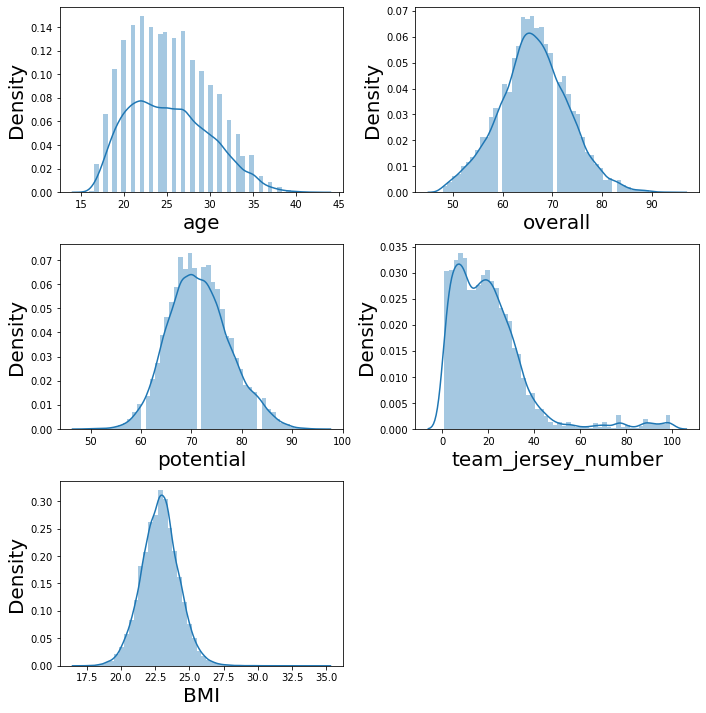

In [46]:
box=data[['age','overall','potential','team_jersey_number','BMI']]
plt.figure(figsize=(10,10))
pltnum=1
for i in box:
    plt.subplot(3,2,pltnum)
    sns.distplot(box[i])
    plt.xlabel(i,fontsize=20)
    plt.ylabel('Density',fontsize=20)
    pltnum+=1
plt.tight_layout()
plt.show() 

**DATA INSIGHTS**
- Overall column is having normal distribution
- Age column is having right skewed and high kurtosis
- potential column is having slightly normal distribution
- BMI is having normal distribution with outliers

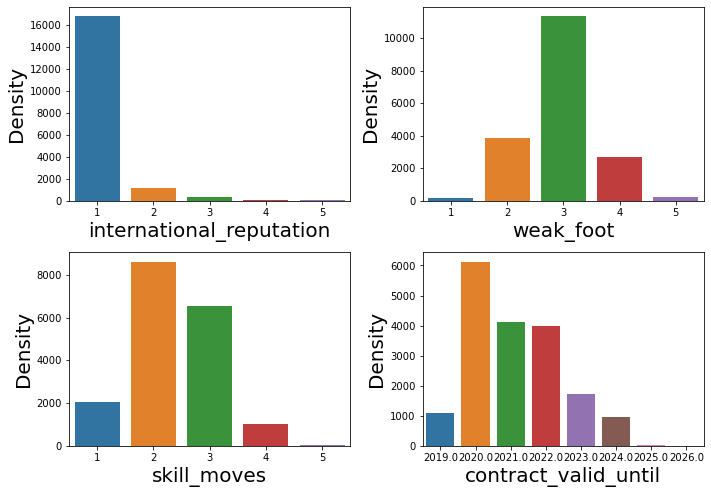

In [43]:
box=data[['international_reputation','weak_foot','skill_moves','contract_valid_until']]
plt.figure(figsize=(10,7))
pltnum=1
for i in box:
    plt.subplot(2,2,pltnum)
    sns.countplot(box[i])
    plt.xlabel(i,fontsize=20)
    plt.ylabel('Density',fontsize=20)
    pltnum+=1
plt.tight_layout()
plt.show() 

**DATA INSIGHTS**
- Internation reputation rating for most players is 1
- Weak foot rating for most player is 3
- Weak foot rating for most player is 2
- Most players contract with team is ending on year 2020

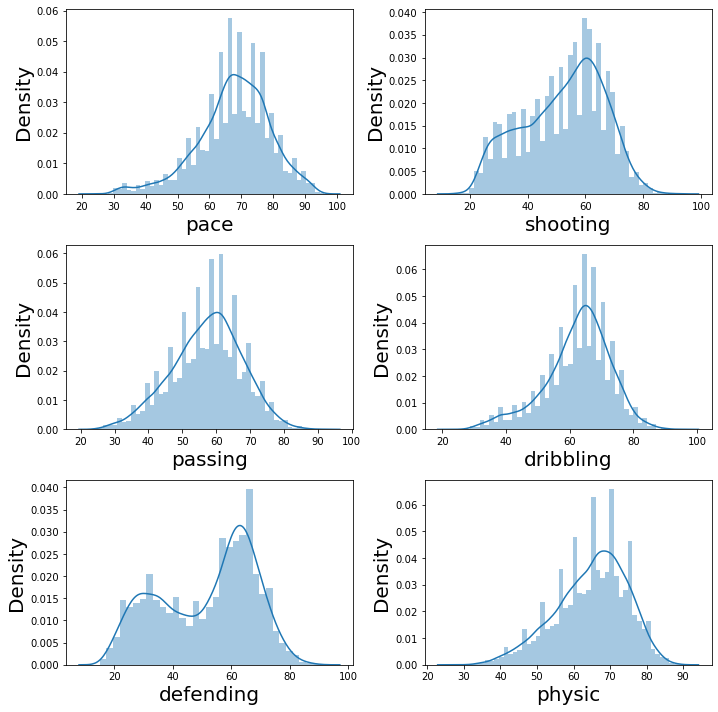

In [40]:
box=data[['pace','shooting','passing','dribbling','defending','physic']]
plt.figure(figsize=(10,10))
pltnum=1
for i in box:
    plt.subplot(3,2,pltnum)
    sns.distplot(box[i])
    plt.xlabel(i,fontsize=20)
    plt.ylabel('Density',fontsize=20)
    pltnum+=1
plt.tight_layout()
plt.show() 

**DATA INSIGHTS**
- pace column is having left skewed distribution


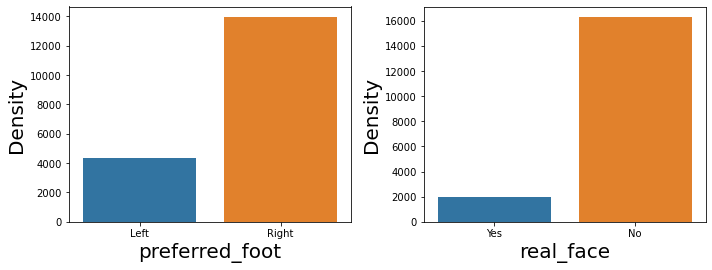

In [47]:
box=data[['preferred_foot','real_face']]
plt.figure(figsize=(10,7))
pltnum=1
for i in box:
    plt.subplot(2,2,pltnum)
    sns.countplot(box[i])
    plt.xlabel(i,fontsize=20)
    plt.ylabel('Density',fontsize=20)
    pltnum+=1
plt.tight_layout()
plt.show() 

**DATA INSIGHTS**
- Player count of right preferred foot is more than left
- Most players face is not matching with real one

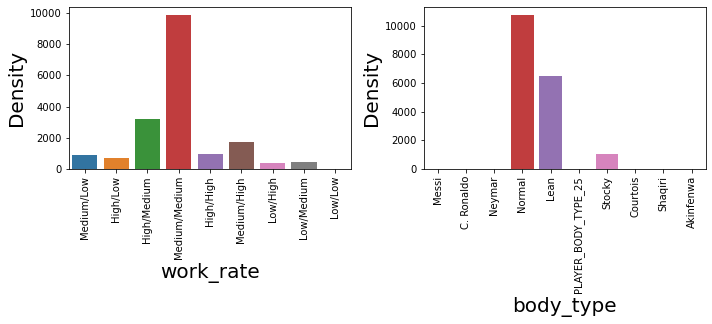

In [54]:
box=data[['work_rate','body_type']]
plt.figure(figsize=(10,7))
pltnum=1
for i in box:
    plt.subplot(2,2,pltnum)
    sns.countplot(box[i])
    plt.xlabel(i,fontsize=20)
    plt.ylabel('Density',fontsize=20)
    plt.xticks(rotation=90)
    pltnum+=1
plt.tight_layout()
plt.show() 

**DATA INSIGHTS**
- Most player body type is Normal and lean

# Bivariate analysis

Text(0.5, 1.0, 'Potential vs Value in EUR')

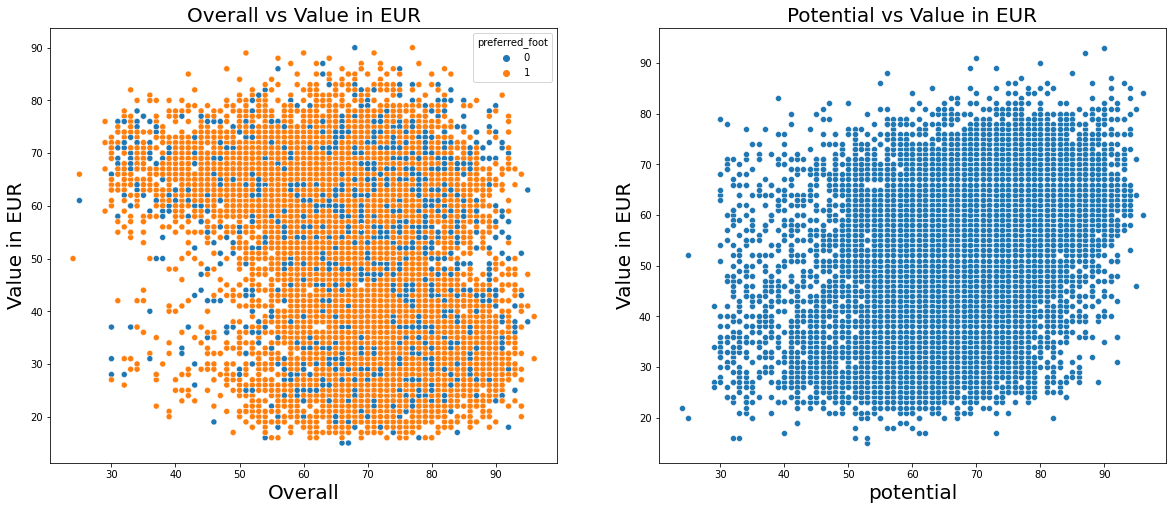

In [49]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.scatterplot(x = data['pace'],y=data['defending'],hue=data['preferred_foot'])
plt.xlabel('Overall',fontsize=20)
plt.ylabel('Value in EUR',fontsize=20)
plt.title('Overall vs Value in EUR',fontsize=20)
plt.subplot(1,2,2)
sns.scatterplot(x = data['pace'],y=data['shooting'])
plt.xlabel('potential',fontsize=20)
plt.ylabel('Value in EUR',fontsize=20)
plt.title('Potential vs Value in EUR',fontsize=20)

Text(0.5, 1.0, 'Potential vs Value in EUR')

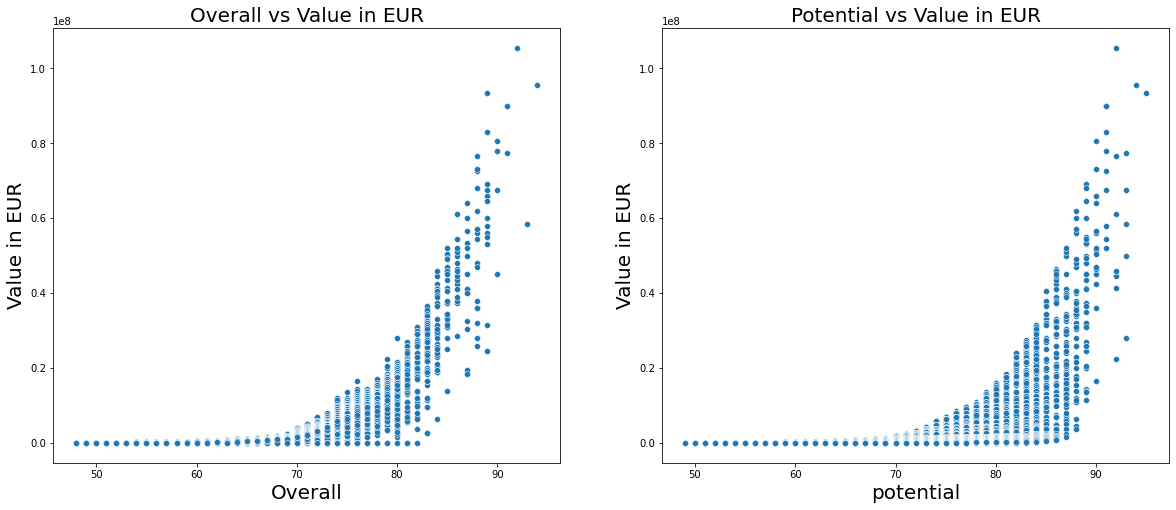

In [26]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.scatterplot(x = data['overall'],y=data['value_eur'])
plt.xlabel('Overall',fontsize=20)
plt.ylabel('Value in EUR',fontsize=20)
plt.title('Overall vs Value in EUR',fontsize=20)
plt.subplot(1,2,2)
sns.scatterplot(x = data['potential'],y=data['value_eur'])
plt.xlabel('potential',fontsize=20)
plt.ylabel('Value in EUR',fontsize=20)
plt.title('Potential vs Value in EUR',fontsize=20)

**DATA INSIGHTS**
- With increase in overall performance the value in EUR of player is increasing.
- With increase in potential of player the value in EUR of player is increasing.

Text(0.5, 1.0, 'potential vs Wage in EUR')

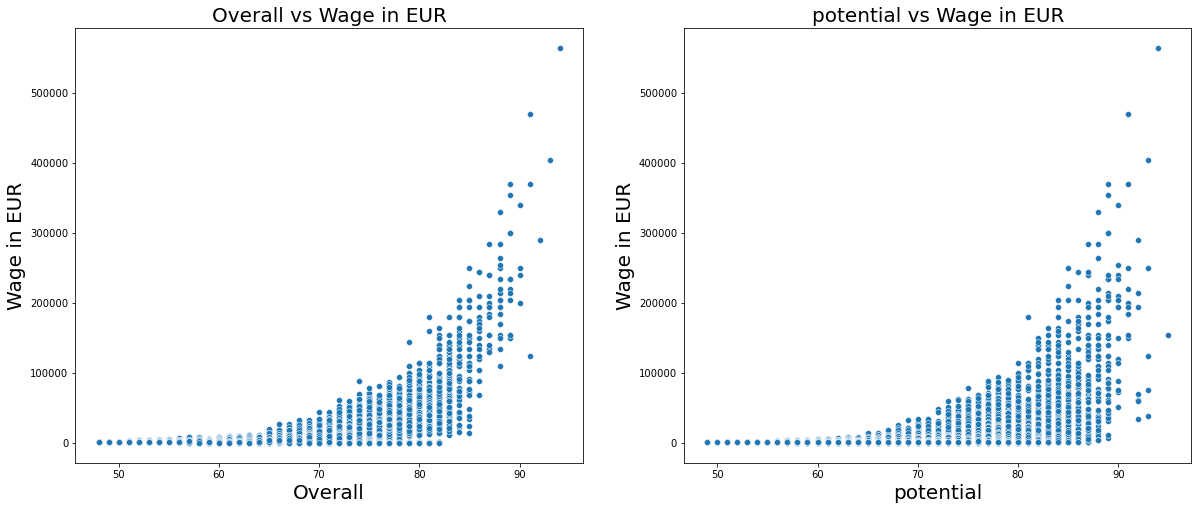

In [24]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.scatterplot(x = data['overall'],y=data['wage_eur'])
plt.xlabel('Overall',fontsize=20)
plt.ylabel('Wage in EUR',fontsize=20)
plt.title('Overall vs Wage in EUR',fontsize=20)
plt.subplot(1,2,2)
sns.scatterplot(x = data['potential'],y=data['wage_eur'])
plt.xlabel('potential',fontsize=20)
plt.ylabel('Wage in EUR',fontsize=20)
plt.title('potential vs Wage in EUR',fontsize=20)

**DATA INSIGHTS**
- With increase in overall performance the wage in EUR of player is increasing.
- With increase in potential of player the wage in EUR of player is increasing.

<AxesSubplot:ylabel='nationality'>

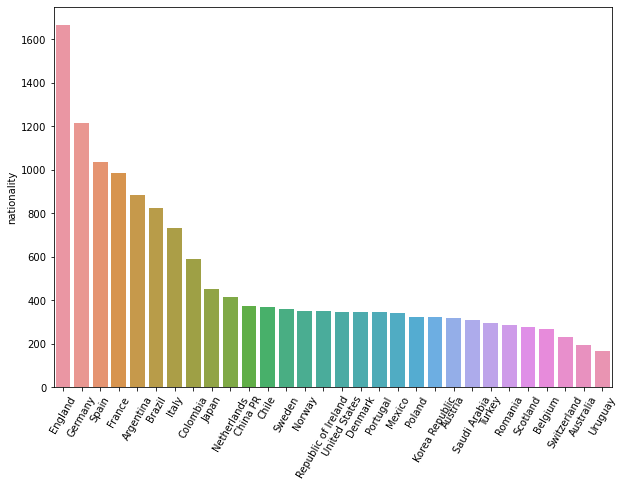

In [37]:
plt.figure(figsize=(10,7))
country_count = data.nationality.value_counts()[:30]
plt.xticks(rotation = 60)
sns.barplot(x = country_count.index, y = country_count)

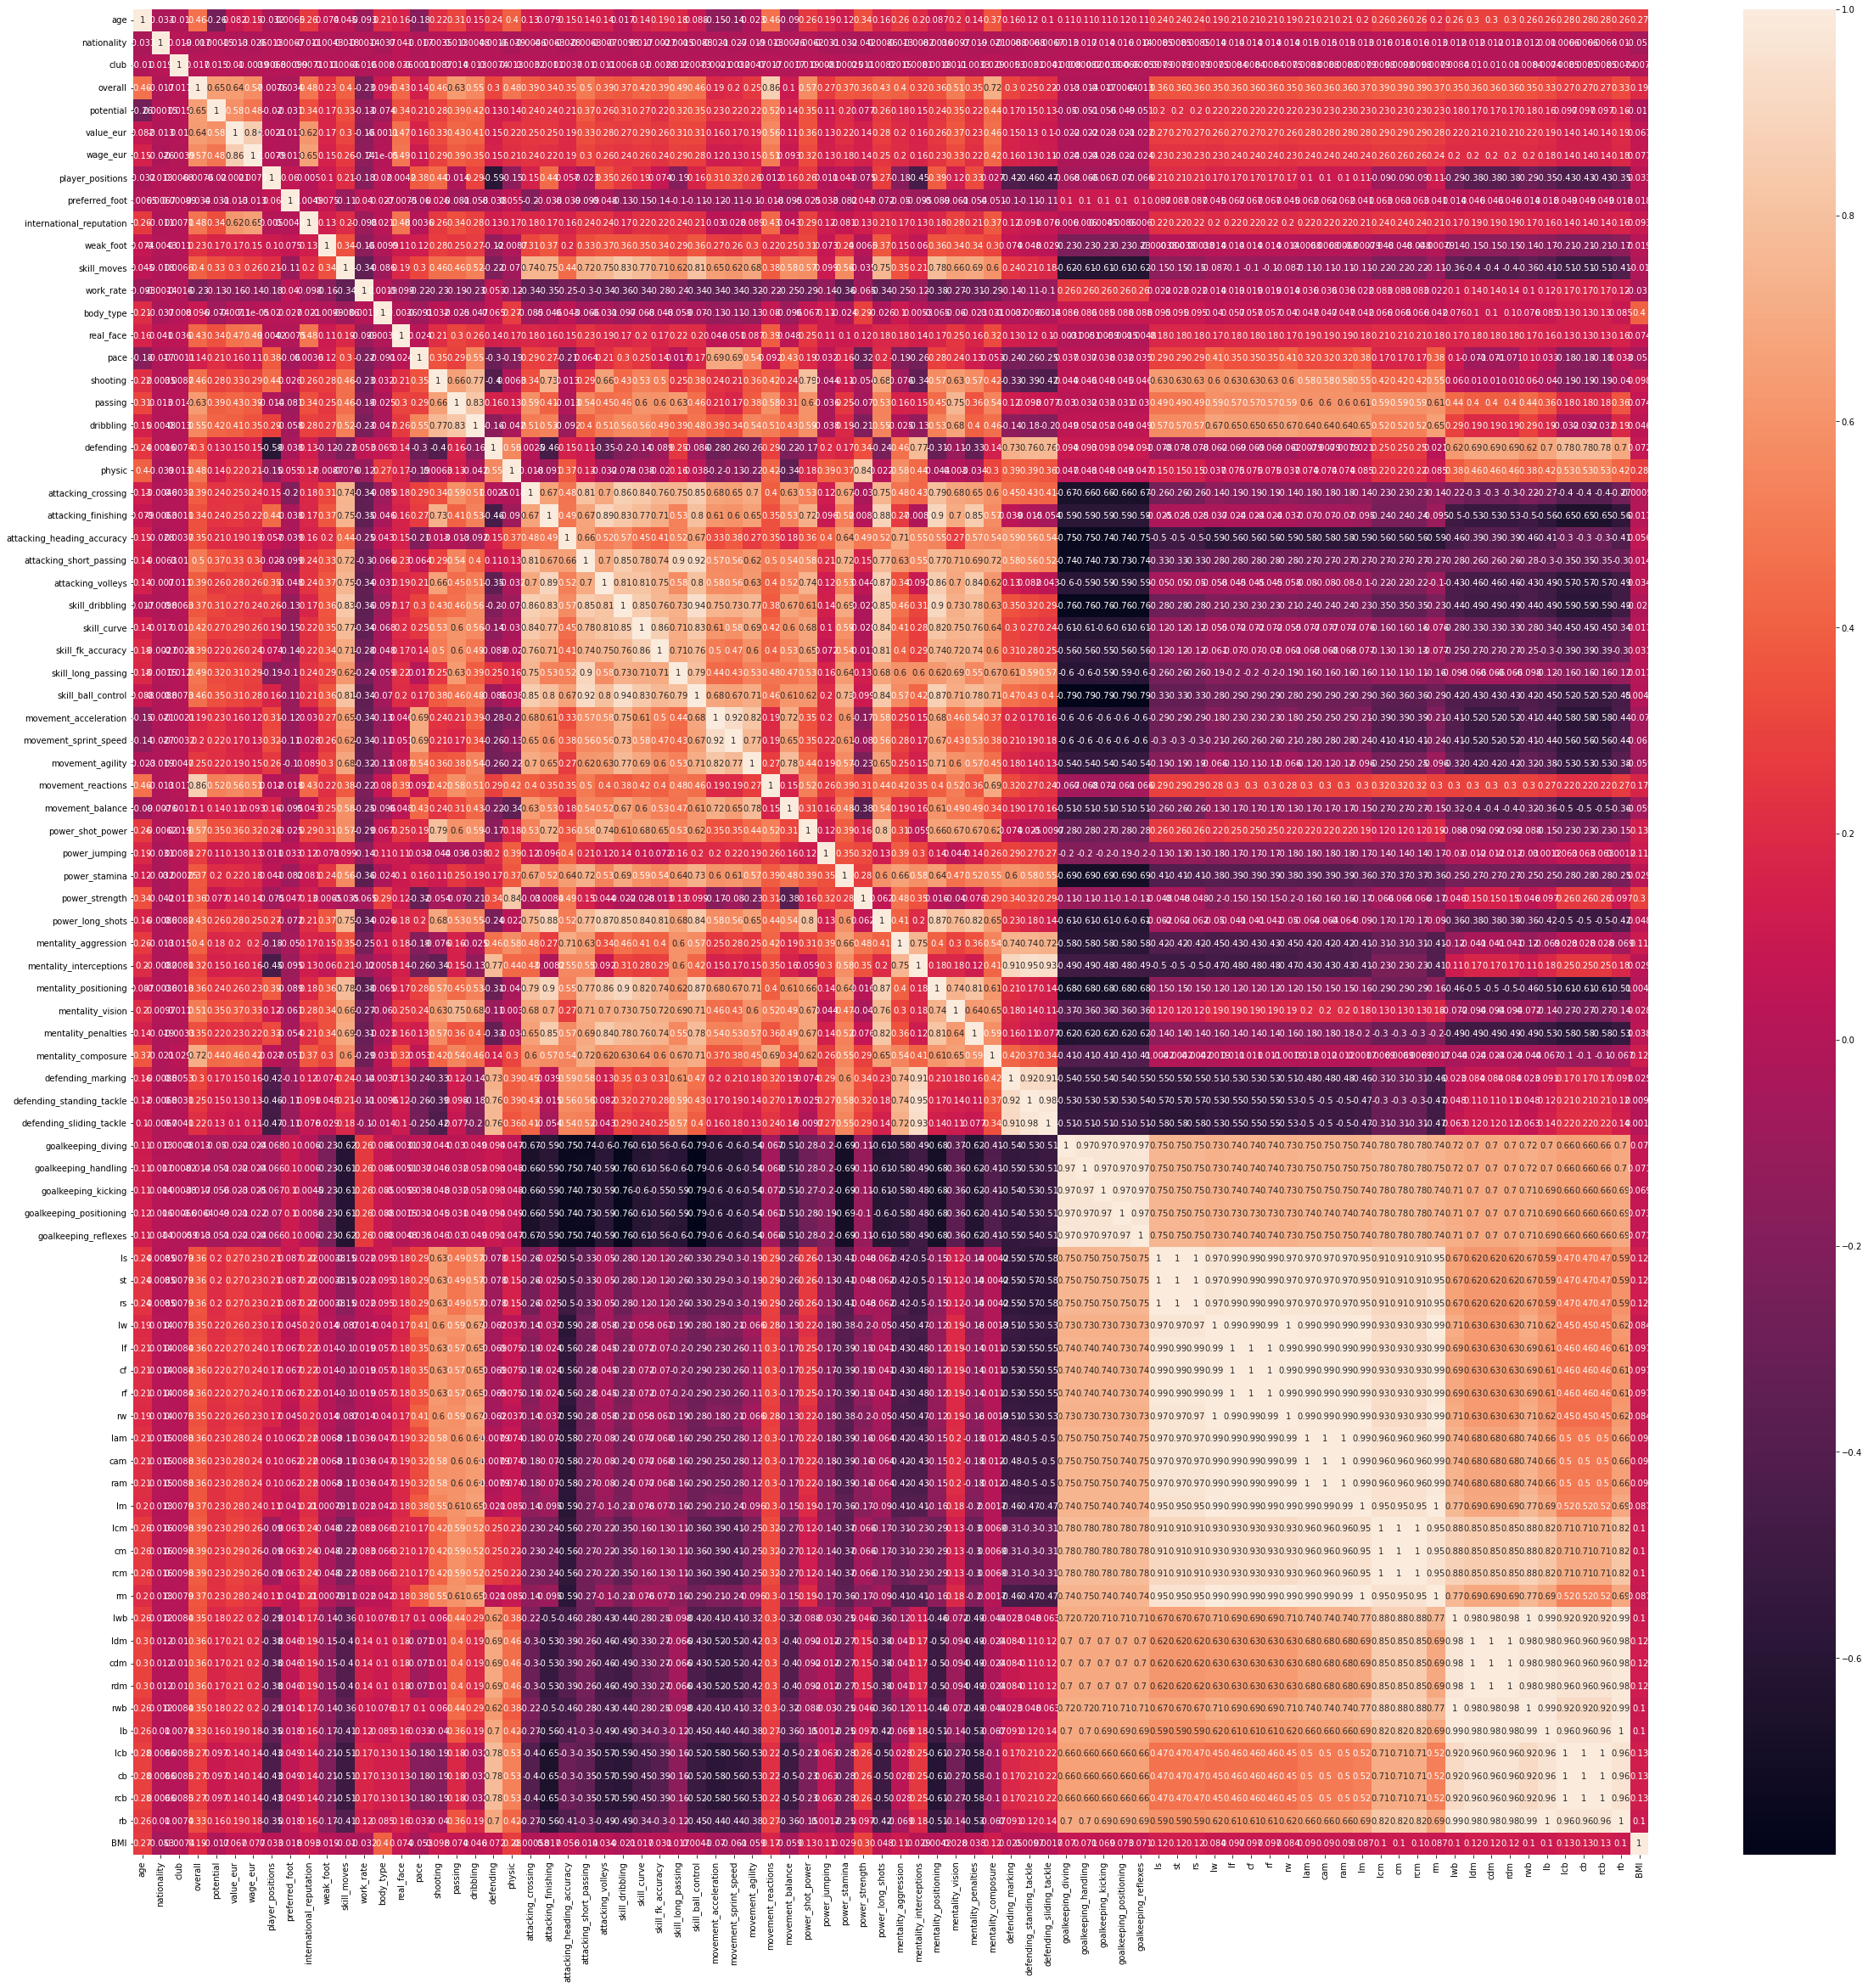

In [77]:
plt.figure(figsize=(40,40))
sns.heatmap(data.corr(),annot=True)
plt.show()

# 5] Data Pre Processing

#### Removing less usefull columns from table

In [5]:
data.drop(labels=['long_name','team_position','contract_valid_until','team_jersey_number'],axis=1,inplace=True)

## Hangling Null values

In [24]:
data.isnull().sum()

age                              0
nationality                      0
club                             0
overall                          0
potential                        0
value_eur                        0
wage_eur                         0
player_positions                 0
preferred_foot                   0
international_reputation         0
weak_foot                        0
skill_moves                      0
work_rate                        0
body_type                        0
real_face                        0
pace                          2036
shooting                      2036
passing                       2036
dribbling                     2036
defending                     2036
physic                        2036
attacking_crossing               0
attacking_finishing              0
attacking_heading_accuracy       0
attacking_short_passing          0
attacking_volleys                0
skill_dribbling                  0
skill_curve                      0
skill_fk_accuracy   

In [31]:
data.loc[data['pace'].isnull()==True,'pace']= np.median(data.pace.dropna(axis=0))

In [32]:
data.loc[data['shooting'].isnull()==True,'shooting']= np.median(data.shooting.dropna(axis=0))

In [33]:
data.loc[data['passing'].isnull()==True,'passing']= np.median(data.passing.dropna(axis=0))

In [34]:
data.loc[data['dribbling'].isnull()==True,'dribbling']= np.median(data.dribbling.dropna(axis=0))

In [35]:
data.loc[data['defending'].isnull()==True,'defending']= np.median(data.defending.dropna(axis=0))

In [36]:
data.loc[data['physic'].isnull()==True,'physic']= np.median(data.physic.dropna(axis=0))

## Removing the rows with null values

In [37]:
data.drop(data[data.ls.isnull()==True].index, inplace=True)

In [15]:
pd.set_option('display.max_rows', None)

In [16]:
data.isnull().sum()

short_name                    0
age                           0
nationality                   0
club                          0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
player_positions              0
preferred_foot                0
international_reputation      0
weak_foot                     0
skill_moves                   0
work_rate                     0
body_type                     0
real_face                     0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dribbling               0
skill_curve                   0
skill_fk_accuracy             0
skill_long_passing            0
skill_ba

## Now there is no null values

## Outlier handing

In [48]:
data.describe()

age       overall     potential     value_eur       wage_eur  \
count  16242.000000  16242.000000  16242.000000  1.624200e+04   16242.000000   
mean      25.141054     66.351311     71.705393  2.578808e+06    9806.550917   
std        4.514191      6.602852      5.988749  5.650534e+06   21828.924637   
min       16.000000     49.000000     54.000000  0.000000e+00       0.000000   
25%       21.000000     62.000000     67.000000  3.500000e+05    1000.000000   
50%       25.000000     66.000000     71.000000  7.500000e+05    3000.000000   
75%       28.000000     71.000000     76.000000  2.300000e+06    9000.000000   
max       38.000000     84.000000     89.000000  1.055000e+08  565000.000000   

       international_reputation     weak_foot   skill_moves          pace  \
count              16242.000000  16242.000000  16242.000000  16242.000000   
mean                   1.105036      3.002647      2.539527     68.425317   
std                    0.380939      0.638101      0.628193     10.192567   
min                    1.000000      1.000000      2.000000     40.000000   
25%                    1.000000      3.000000      2.000000     62.000000   
50%                    1.000000      3.000000      2.000000     69.000000   
75%                    1.000000      3.000000      3.000000     75.000000   
max                    5.000000      5.000000      5.000000     96.000000   

           shooting       passing     dribbling     defending        physic  \
count  16242.000000  16242.000000  16242.000000  16242.000000  16242.000000   
mean      52.298301     57.233777     62.531585     51.553503     64.876678   
std       14.029418     10.407844     10.284950     16.419528      9.760162   
min       15.000000     24.000000     23.000000     15.000000     27.000000   
25%       42.000000     50.000000     57.000000     36.000000     59.000000   
50%       54.000000     58.000000     64.000000     56.000000     66.000000   
75%       63.000000     64.000000     69.000000     65.000000     72.000000   
max       93.000000     92.000000     96.000000     90.000000     90.000000   

       attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
count        16242.000000         16242.000000                16242.000000   
mean            54.180766            49.851188                   56.995382   
std             14.044269            16.340531                   11.638265   
min             11.000000            10.000000                   12.000000   
25%             44.000000            36.000000                   49.000000   
50%             56.000000            52.000000                   58.000000   
75%             65.000000            63.000000                   65.000000   
max             93.000000            95.000000                   93.000000   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
count             16242.000000       16242.000000     16242.000000   
mean                 62.728543          46.674116        60.856360   
std                   9.619125          14.700085        12.346669   
min                  23.000000          10.000000        16.000000   
25%                  57.000000          35.000000        55.000000   
50%                  64.000000          46.000000        63.000000   
75%                  69.000000          58.000000        69.000000   
max                  92.000000          90.000000        97.000000   

        skill_curve  skill_fk_accuracy  skill_long_passing  \
count  16242.000000       16242.000000        16242.000000   
mean      51.434491          46.282478           56.136929   
std       15.094479          14.994287           12.301053   
min       11.000000          10.000000           19.000000   
25%       40.000000          34.000000           48.000000   
50%       52.000000          44.000000           58.000000   
75%       63.000000          58.000000           65.000000   
max       94.000000          94.000000           92.000000 

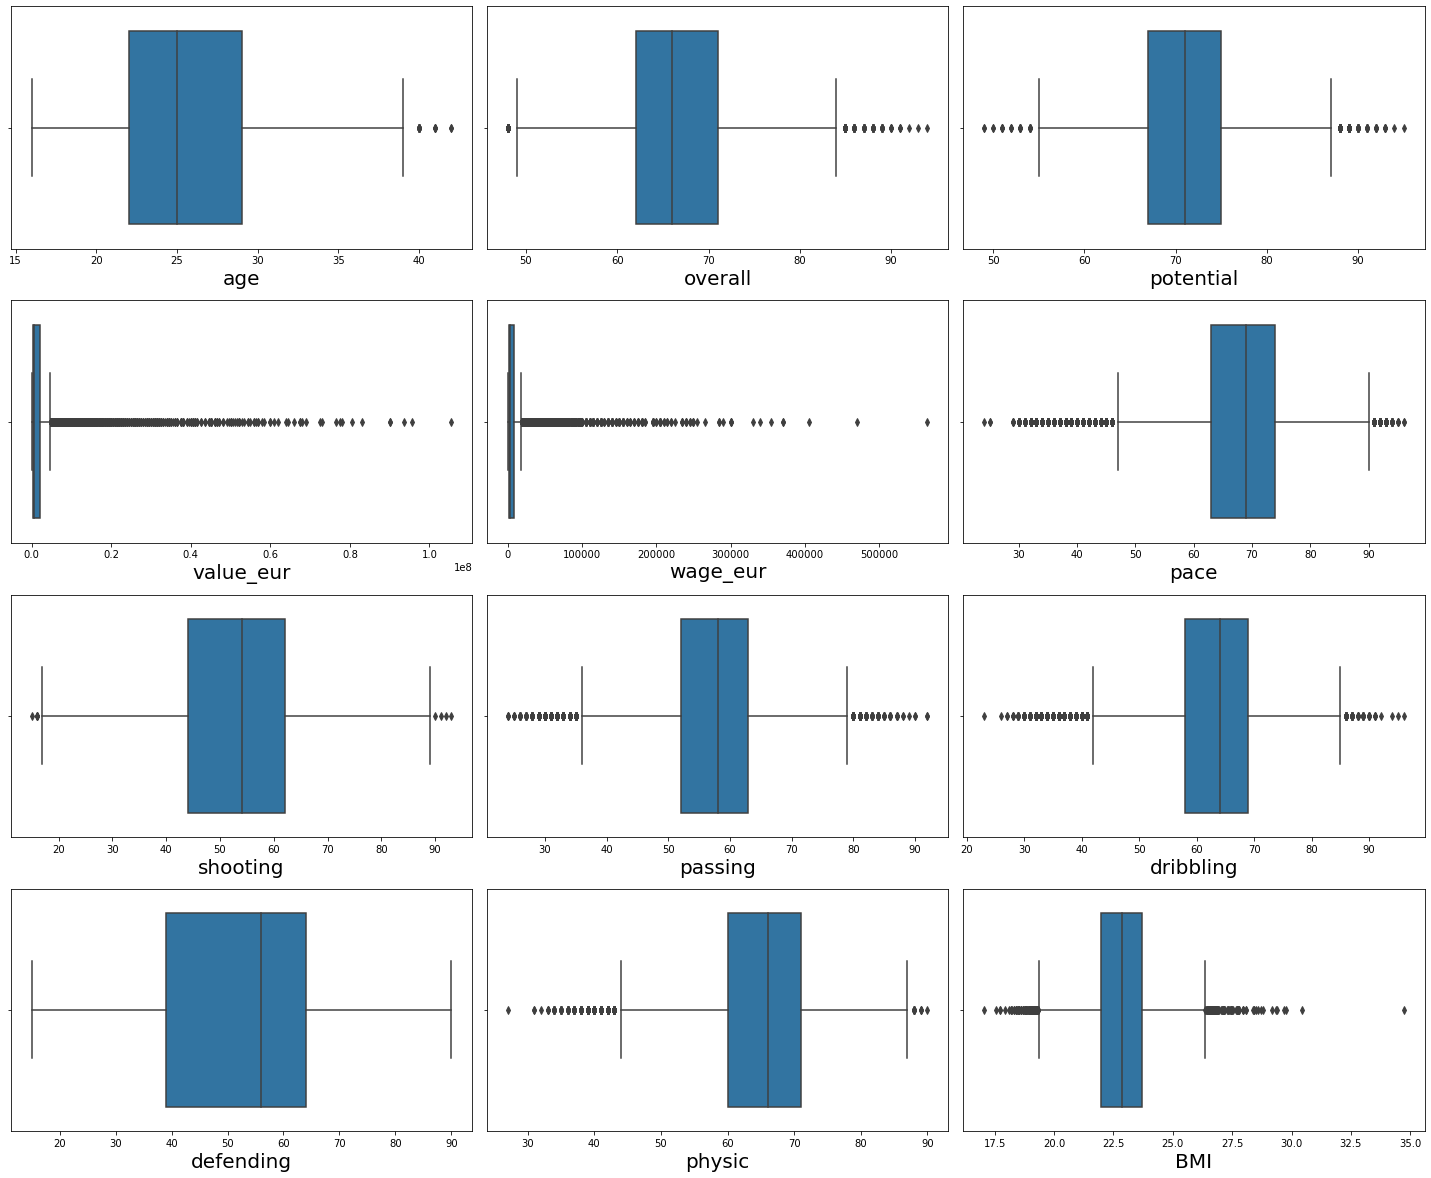

In [82]:
box=data[['age','overall','potential','value_eur','wage_eur','pace','shooting',
          'passing','dribbling','defending','physic','BMI']]
plt.figure(figsize=(20,20))
pltnum=1
for i in box:
    plt.subplot(5,3,pltnum)
    sns.boxplot(box[i])
    plt.xlabel(i,fontsize=20)
    pltnum+=1
plt.tight_layout()
plt.show()

In [13]:
from scipy import stats
IQR = stats.iqr(data['age'],interpolation = 'midpoint')
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
minl = Q1 - 1.5*IQR
maxl = Q3 + 1.5*IQR
print(minl)
print(maxl)

10.5
38.5


In [14]:
data.loc[data['age']>maxl]

short_name  age       nationality                         club  \
868            Hilton   41            Brazil              Montpellier HSC   
1880       C. Pizarro   40              Peru             SV Werder Bremen   
2963      D. Dainelli   40             Italy                      Livorno   
3696          Y. Endo   39             Japan                  Gamba Osaka   
5239       G. McAuley   39  Northern Ireland             Northern Ireland   
5240             Nino   39             Spain                     Elche CF   
5242    H. Campagnaro   39         Argentina                      Pescara   
5249   D. Moscardelli   39             Italy                         Pisa   
6232       F. Balmont   39            France                    Dijon FCO   
7230    Lee Dong Gook   40    Korea Republic       Jeonbuk Hyundai Motors   
7232       C. Salcido   39            Mexico  Tiburones Rojos de Veracruz   
7239    M. Wasilewski   39            Poland                 Wisła Kraków   
8359        F. Cubero   40         Argentina              Vélez Sarsfield   
8413      D. Ferreira   39          Colombia              Unión Magdalena   
10665        F. Kippe   41            Norway                Lillestrøm SK   
12875     O. Storflor   39            Norway              Ranheim Fotball   
13003    H. Sulaimani   42      Saudi Arabia                      Al Ahli   
13778    A. Wilbraham   39           England                     Rochdale   
14527       D. Bulman   40           England                 Crawley Town   
16314      K. Ellison   40           England                    Morecambe   
18233       Zhou Ting   40          China PR             Dalian YiFang FC   

       overall  potential  value_eur  wage_eur player_positions  \
868         78         78          0     21000               CB   
1880        75         75          0     20000               ST   
2963        73         73          0      2000               CB   
3696        72         72     775000      7000     CM, CDM, CAM   
5239        70         70          0         0               CB   
5240        70         70     525000      4000           CF, ST   
5242        70         70     240000      2000               CB   
5249        70         70     525000      2000           CF, ST   
6232        69         69     260000      5000               CM   
7230        68         68          0      4000               ST   
7232        68         68     120000      2000          CB, CDM   
7239        68         68     120000      2000               CB   
8359        67         67          0      3000           CB, RB   
8413        67         67     210000      1000              CAM   
10665       65         65          0      1000               CB   
12875       63         63     100000      1000               RW   
13003       63         63          0      5000               LB   
13778       62         62      90000      1000               ST   
14527       61         61          0      1000          CM, CDM   
16314       58         58          0      1000           LM, ST   
18233       49         49          0      1000           LB, RB   

      preferred_foot  ...   ldm   cdm   rdm   rwb    lb   lcb    cb   rcb  \
868            Right  ...  74+2  74+2  74+2  67+2  68+2  76+2  76+2  76+2   
1880           Right  ...  55+3  55+3  55+3  48+3  46+3  50+3  50+3  50+3   
2963           Right  ...  64+2  64+2  64+2  56+2  59+2  72+2  72+2  72+2   
3696           Right  ...  69+3  69+3  69+3  65+3  63+3  66+3  66+3  66+3   
5239           Right  ...  61+2  61+2  61+2  54+2  58+2  69+2  69+2  69+2   
5240           Right  ...  55+2  55+2  55+2  54+2  52+2  53+2  53+2  53+2   
5242           Right  ...  61+2  61+2  61+2  57+2  59+2  69+2  69+2  69+2   
5249            Left  ...  51+2  51+2  51+2  49+2  47+2  50+2  50+2  50+2   
6232           Right  ...  70+2  70+2  70+2  64+2  63+2  67+2  67+2  67+2   
7230           Right  ...  44+3  44+3  44+3  43+3  41+3  42+3  42+3  42

In [15]:
print('The oulier percent of age is ',(((data.loc[data['age']>maxl,'age'].value_counts().sum())/data['age'].value_counts().sum())*100),'%')

The oulier percent of age is  0.12929442186922793 %


In [16]:
data.loc[data['age']>maxl,'age']=np.median(data['age'])

In [27]:
IQR = stats.iqr(data['overall'],interpolation = 'midpoint')
Q1 = data['overall'].quantile(0.25)
Q3 = data['overall'].quantile(0.75)
minl = Q1 - 1.5*IQR
maxl = Q3 + 1.5*IQR
print(minl)
print(maxl)

48.5
84.5


In [28]:
data.loc[data['overall']<minl]

short_name  age          nationality  \
18235    Tao Qianglong   17             China PR   
18236     B. McPherson   17              England   
18237          J. Hope   17              England   
18238         L. Singh   17               Canada   
18240       C. Painter   17              England   
18241          M. Peck   18              England   
18242       R. Wikberg   16               Sweden   
18243     E. Sartorius   16              England   
18244        K. Barker   18              England   
18245      C. Pattison   18              England   
18246     H. Kyprianou   18               Cyprus   
18247        Liu Guobo   19             China PR   
18248       T. Klysner   17              Denmark   
18249    Shan Huanhuan   20             China PR   
18250        R. Roache   19  Republic of Ireland   
18252      A. Aksungur   18               Turkey   
18253        N. Morley   18              England   
18254  E. Jääskeläinen   18              Finland   
18255         C. Heath   18              England   
18256    S. Cartwright   18              England   
18257     Song Min Kyu   19       Korea Republic   
18258       L. Collins   18                Wales   
18260    A. De Angelis   21                Italy   
18261        H. Shirai   19                Japan   
18262        S. Callan   19  Republic of Ireland   
18263       F. Nevarez   18               Mexico   
18264     Zhang Yufeng   21             China PR   
18265        L. Offord   19              England   
18266        Wang Peng   21             China PR   
18267          J. Ryan   19  Republic of Ireland   
18268     M. Gallagher   18  Republic of Ireland   
18269     Huang Jiahui   18             China PR   
18270         M. Sagaf   21              England   
18271         E. Tweed   20  Republic of Ireland   
18273       Shao Shuai   22             China PR   
18274     Xiao Mingjie   22             China PR   
18275        Zhang Wei   19             China PR   
18276     Wang Haijian   18             China PR   
18277       Pan Ximing   26             China PR   

                                club  overall  potential  value_eur  wage_eur  \
18235         Hebei China Fortune FC       48         73      60000      1000   
18236                   Grimsby Town       48         73      60000      1000   
18237                   Grimsby Town       48         72      60000      1000   
18238                     Brøndby IF       48         70      60000      1000   
18240                   Grimsby Town       48         69      60000      1000   
18241                Plymouth Argyle       48         68      60000      1000   
18242                  Östersunds FK       48         67      50000      1000   
18243                   Lincoln City       48         67      60000      1000   
18244            Peterborough United       48         67      60000      1000   
18245             Milton Keynes Dons       48         67      60000      1000   
18246                  Leyton Orient       48         67      60000      1000   
18247        Beijing Sinobo Guoan FC       48         66      60000      1000   
18248                     Randers FC       48         66      60000      1000   
18249               Dalian YiFang FC       48         65      70000      2000   
18250                      Blackpool       48         65      60000      1000   
18252                    Denizlispor       48         65      60000      1000   
18253                  Burton Albion       48         65      60000      1000   
18254                      Blackpool       48         65      60000      1000   
18255                Crewe Alexandra       48         65      60000      1000   
18256            Peterborough United       48         64      60000      1000   
18257                Pohang Steelers       48         64      60000      1000   
18258                 Newport County       48         63      60000      1000   
18260                         Ascoli       48         62      60000 

In [31]:
data.loc[data['overall']<minl,'overall']=np.median(data['overall'])

In [29]:
data.loc[data['overall']>maxl]

short_name  age         nationality                 club  \
0               L. Messi   32           Argentina         FC Barcelona   
1      Cristiano Ronaldo   34            Portugal             Juventus   
2              Neymar Jr   27              Brazil  Paris Saint-Germain   
4              E. Hazard   28             Belgium          Real Madrid   
5           K. De Bruyne   28             Belgium      Manchester City   
7            V. van Dijk   27         Netherlands            Liverpool   
8              L. Modrić   33             Croatia          Real Madrid   
9               M. Salah   27               Egypt            Liverpool   
10             K. Mbappé   20              France  Paris Saint-Germain   
11          K. Koulibaly   28             Senegal               Napoli   
12               H. Kane   25             England    Tottenham Hotspur   
15              N. Kanté   28              France              Chelsea   
16          G. Chiellini   34               Italy             Juventus   
17             S. Agüero   31           Argentina      Manchester City   
18          Sergio Ramos   33               Spain          Real Madrid   
19             L. Suárez   32             Uruguay         FC Barcelona   
20        R. Lewandowski   30              Poland    FC Bayern München   
21       Sergio Busquets   30               Spain         FC Barcelona   
22          A. Griezmann   28              France         FC Barcelona   
23             P. Dybala   25           Argentina             Juventus   
24              P. Pogba   26              France    Manchester United   
26           R. Sterling   24             England      Manchester City   
27            C. Eriksen   27             Denmark    Tottenham Hotspur   
29                 Piqué   32               Spain         FC Barcelona   
33           David Silva   33               Spain      Manchester City   
34             E. Cavani   32             Uruguay  Paris Saint-Germain   
35              D. Godín   33             Uruguay                Inter   
36              T. Kroos   29             Germany          Real Madrid   
37               M. Reus   30             Germany    Borussia Dortmund   
38         P. Aubameyang   30               Gabon              Arsenal   
39               S. Mané   27             Senegal            Liverpool   
40            A. Laporte   25              France      Manchester City   
41        Bernardo Silva   24            Portugal      Manchester City   
42              Casemiro   27              Brazil          Real Madrid   
43                H. Son   26      Korea Republic    Tottenham Hotspur   
44           Fernandinho   34              Brazil      Manchester City   
45          Thiago Silva   34              Brazil  Paris Saint-Germain   
46            K. Benzema   31              France          Real Madrid   
47         J. Vertonghen   32             Belgium    Tottenham Hotspur   
48            D. Mertens   32             Belgium               Napoli   
49            M. Hummels   30             Germany    Borussia Dortmund   
50       T. Alderweireld   30             Belgium    Tottenham Hotspur   
51            Jordi Alba   30               Spain         FC Barcelona   
52                Thiago   28               Spain    FC Bayern München   
54            L. Insigne   28               Italy               Napoli   
55               L. Sané   23             Germany      Manchester City   
56            Marquinhos   25              Brazil  Paris Saint-Germain   
57           M. Škriniar   24            Slovakia                Inter   
58           M. Verratti   26               Italy  Paris Saint-Germain   
59             S. Umtiti   25              France         FC Barcelona   
61            J. Kimmich   24             Germany    FC Bayern München   
62                  Isco   27               Spain          Real Madrid   
63       Roberto Firmino   27              Brazil            Liverpool   
64            I. R

In [30]:
print('The oulier percent of overall is ',(((data.loc[data['overall']>maxl,'overall'].value_counts().sum())/data['overall'].value_counts().sum())*100),'%')

The oulier percent of overall is  0.5664327053318556 %


In [32]:
data.loc[data['overall']>maxl,'overall']=np.median(data['overall'])

In [33]:
IQR = stats.iqr(data['potential'],interpolation = 'midpoint')
Q1 = data['potential'].quantile(0.25)
Q3 = data['potential'].quantile(0.75)
minl = Q1 - 1.5*IQR
maxl = Q3 + 1.5*IQR
print(minl)
print(maxl)

53.5
89.5


In [34]:
data.loc[data['potential']<minl]

short_name  age nationality                           club  overall  \
17777        Sun Kai   28    China PR  Shanghai Greenland Shenhua FC       53   
17778        Ge Zhen   32    China PR                    Shenzhen FC       53   
17779      G. Poncet   27     Uruguay                     La Equidad       53   
17945         Jin Bo   26    China PR               Guangzhou R&F FC       52   
17946     J. McCombe   36     England                   Lincoln City       52   
17947  Wang Xuanhong   29    China PR               Beijing Renhe FC       52   
18064     Zhang Gong   27    China PR               Guangzhou R&F FC       51   
18065    W. Horlison   27     England                           Bury       51   
18167      Z. Alkurt   28      Turkey                    Kayserispor       50   
18168   R. Hernández   30      Mexico    Tiburones Rojos de Veracruz       50   
18232     Xie Weijun   21    China PR                Tianjin TEDA FC       49   
18233      Zhou Ting   25    China PR               Dalian YiFang FC       49   
18234   Zhang Junzhe   28    China PR         Hebei China Fortune FC       49   
18277     Pan Ximing   26    China PR         Hebei China Fortune FC       66   

       potential  value_eur  wage_eur player_positions preferred_foot  \
17777         53      50000      2000               LB           Left   
17778         53      40000      2000       LB, RB, CB          Right   
17779         53      60000      1000               ST           Left   
17945         53      60000      2000               RM          Right   
17946         52      10000      1000               CB          Right   
17947         52      50000      2000     CM, CAM, CDM          Right   
18064         53      40000      2000              CDM          Right   
18065         51      40000      1000               RM           Left   
18167         50      30000      2000               RW           Left   
18168         50      30000      1000               CM          Right   
18232         53      40000      2000       RM, ST, CM          Right   
18233         49          0      1000           LB, RB          Right   
18234         49      30000      2000               RB          Right   
18277         51      40000      2000               CM          Right   

       international_reputation  weak_foot  skill_moves      work_rate  \
17777                         1          3            2    Medium/High   
17778                         1          2            2  Medium/Medium   
17779                         1          3            2    High/Medium   
17945                         1          3            2  Medium/Medium   
17946                         1          2            2  Medium/Medium   
17947                         1          2            2  Medium/Medium   
18064                         1          3            2  Medium/Medium   
18065                         1          3            2  Medium/Medium   
18167                         1          3            2  Medium/Medium   
18168                         1          1            2        Low/Low   
18232                         1          2            2     Medium/Low   
18233                         1          3            2       Low/High   
18234                         1          2            2        Low/Low   
18277                         1          3            2  Medium/Medium   

      body_type real_face  pace  shooting  passing  dribbling  defending  \
17777    Normal        No  57.0      24.0     42.0       31.0       54.0   
17778      Lean        No  65.0      28.0     31.0       51.0       54.0   
17779      Lean        No  50.0      52.0     32.0       45.0       28.0   
17945    Normal        No  64.0      53.0     41.0       59.0       26.0   
17946      Lean        No  24.0      22.0     30.0       23.0       50.0   
17947    Normal        No  46.0      43.0     46.0       50.0       51.0   
18064    Normal        No  57.0      36.0     45.0     

In [36]:
data.loc[data['potential']<minl,'potential']=np.median(data['potential'])

In [35]:
data.loc[data['potential']>maxl]

short_name  age  nationality                 club  overall  \
0                L. Messi   32    Argentina         FC Barcelona       66   
1       Cristiano Ronaldo   34     Portugal             Juventus       66   
2               Neymar Jr   27       Brazil  Paris Saint-Germain       66   
4               E. Hazard   28      Belgium          Real Madrid       66   
5            K. De Bruyne   28      Belgium      Manchester City       66   
7             V. van Dijk   27  Netherlands            Liverpool       66   
8               L. Modrić   33      Croatia          Real Madrid       66   
9                M. Salah   27        Egypt            Liverpool       66   
10              K. Mbappé   20       France  Paris Saint-Germain       66   
11           K. Koulibaly   28      Senegal               Napoli       66   
12                H. Kane   25      England    Tottenham Hotspur       66   
15               N. Kanté   28       France              Chelsea       66   
23              P. Dybala   25    Argentina             Juventus       66   
24               P. Pogba   26       France    Manchester United       66   
26            R. Sterling   24      England      Manchester City       66   
40             A. Laporte   25       France      Manchester City       66   
41         Bernardo Silva   24     Portugal      Manchester City       66   
55                L. Sané   23      Germany      Manchester City       66   
56             Marquinhos   25       Brazil  Paris Saint-Germain       66   
57            M. Škriniar   24     Slovakia                Inter       66   
73             M. de Ligt   19  Netherlands             Juventus       66   
75             F. de Jong   22  Netherlands         FC Barcelona       66   
76              R. Varane   26       France          Real Madrid       66   
77                N. Süle   23      Germany    FC Bayern München       66   
78    S. Milinković-Savić   24       Serbia                Lazio       66   
79                  Rodri   23        Spain      Manchester City       66   
108             J. Sancho   19      England    Borussia Dortmund       84   
109            K. Havertz   20      Germany  Bayer 04 Leverkusen       84   
110            O. Dembélé   22       France         FC Barcelona       84   
157                Fabián   23        Spain               Napoli       83   
411            João Félix   19     Portugal      Atlético Madrid       80   
568          Vinícius Jr.   18       Brazil          Real Madrid       79   
1254             P. Foden   19      England      Manchester City       76   

      potential  value_eur  wage_eur player_positions preferred_foot  \
0            94   95500000    565000       RW, CF, ST           Left   
1            93   58500000    405000           ST, LW          Right   
2            92  105500000    290000          LW, CAM          Right   
4            91   90000000    470000           LW, CF          Right   
5            91   90000000    370000          CAM, CM          Right   
7            91   78000000    200000               CB          Right   
8            90   45000000    340000               CM          Right   
9            90   80500000    240000           RW, ST           Left   
10           95   93500000    155000           ST, RW          Right   
11           91   67500000    150000               CB          Right   
12           91   83000000    220000               ST          Right   
15           90   66000000    235000          CDM, CM          Right   
23           92   76500000    215000          CAM, RW           Left   
24           91   72500000    250000          CM, CDM          Right   
26           90   73000000    255000           RW, LW          Right   
40           90   56500000    195000           CB, LB           Left   
41           90   64000000    210000      RW, CAM, CM           Left   
55           92   61000000    195000               LW           Left   
56           90   51500000  

In [37]:
data.loc[data['potential']>maxl,'potential']=np.median(data['potential'])

In [39]:
IQR = stats.iqr(data['pace'],interpolation = 'midpoint')
Q1 = data['pace'].quantile(0.25)
Q3 = data['pace'].quantile(0.75)
minl = Q1 - 1.5*IQR
maxl = Q3 + 1.5*IQR
print(minl)
print(maxl)

40.0
96.0


In [40]:
data.loc[data['pace']<minl]

short_name  age          nationality  \
380            José Fonte   35             Portugal   
495          Jorge Molina   37                Spain   
519              F. Fazio   32            Argentina   
669                 Dante   35               Brazil   
851        J. Vestergaard   26              Denmark   
868                Hilton   25               Brazil   
870          A. Granqvist   34               Sweden   
880              N. Şahin   30               Turkey   
911                 Bruno   35                Spain   
924        Daniel Carriço   30             Portugal   
928                Iborra   31                Spain   
958                 Naldo   30               Brazil   
1062         M. Arambarri   23              Uruguay   
1116                Bruno   29                Spain   
1135           Iván Ramis   34                Spain   
1141           R. Civelli   35            Argentina   
1155            G. Murray   35              England   
1253          J. Monsario   34              Ecuador   
1424    B. Schweinsteiger   34              Germany   
1553           Raúl Navas   31                Spain   
1575        Y. Abdelhamid   31              Morocco   
1577            D. Siovas   30               Greece   
1613         A. Aguilmera   33              Ecuador   
1858          S. Mitrović   29               Serbia   
1880           C. Pizarro   25                 Peru   
1888            W. Morgan   35              Jamaica   
1903              S. Dann   32              England   
1913            G. Cabral   33            Argentina   
1941           O. Cardozo   36             Paraguay   
1948         A. Ranocchia   31                Italy   
2010         H. Badstuber   30              Germany   
2064       Eric Botteghin   31               Brazil   
2228           I. Kutepov   25               Russia   
2365              C. Lema   29            Argentina   
2380               Felipe   34               Brazil   
2408             R. Vlaar   34          Netherlands   
2439           A. Aguilar   34             Colombia   
2448                 Titi   31               Brazil   
2462   J. van der Heijden   31          Netherlands   
2475           B. Poulain   31               France   
2486               Alcalá   30                Spain   
2530             T. Klose   31          Switzerland   
2572          M. Pavlović   29              Croatia   
2811          B. Djimsiti   26              Albania   
2829                Vesga   26                Spain   
2840     M. van der Hoorn   26          Netherlands   
2859                César   26               Brazil   
2914          B. Nuytinck   29          Netherlands   
2963          D. Dainelli   25                Italy   
2975          Bruno Alves   37             Portugal   
2983           Javi Fuego   35                Spain   
2987       J. Insaurralde   34            Argentina   
2993              M. Russ   33              Germany   
2995           C. Gentner   33              Germany   
3004             L. Ulloa   32            Argentina   
3013            N. Spolli   36            Argentina   
3026             J. Babin   32               France   
3030             S. Prödl   32              Austria   
3062           R. Bennett   29              England   
3074         Diego Ângelo   33               Brazil   
3101          V. Wormgoor   30          Netherlands   
3135           J. Vuković   31               Serbia   
3160        Vicente Gómez   30                Spain   
3267        Paolito Serra   27               Brazil   
3377            F. Vicari   24                Italy   
3537              E. Roco   26                Chile   
3588             V. Sasso   28               France   
3695           D. Maietta   36                Italy   
3696              Y. Endo   25                Japan   
3700        J. Bottinelli   34            Argentina   
3717         N. Lombaerts   34              Belgium   
3727            J. Sorbon   35               France   


In [46]:
print('The oulier percent of pace is ',(((data.loc[data['pace']<minl,'pace'].value_counts().sum())/data['pace'].value_counts().sum())*100),'%')

The oulier percent of pace is  2.105652013298855 %


In [47]:
data.loc[data['pace']<minl,'pace']=np.median(data['pace'])

In [41]:
data.loc[data['pace']>maxl]

Empty DataFrame
Columns: [short_name, age, nationality, club, overall, potential, value_eur, wage_eur, player_positions, preferred_foot, international_reputation, weak_foot, skill_moves, work_rate, body_type, real_face, pace, shooting, passing, dribbling, defending, physic, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_strength, power_long_shots, mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure, defending_marking, defending_standing_tackle, defending_sliding_tackle, goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning, goalkeeping_reflexes, ls, st, rs, lw, lf, cf, rf, rw, lam, cam, ram, lm, lcm, cm, rcm, rm, lwb, ldm, cdm, rdm, rwb, lb, lcb, cb, rcb, rb]
Index: []

In [20]:
from scipy import stats
IQR = stats.iqr(data['shooting'],interpolation = 'midpoint')
Q1 = data['shooting'].quantile(0.25)
Q3 = data['shooting'].quantile(0.75)
minl = Q1 - 1.5*IQR
maxl = Q3 + 1.5*IQR
print(minl)
print(maxl)

17.0
89.0


In [21]:
data.loc[data['shooting']<minl]

short_name  age  nationality  club  overall  potential  value_eur  \
3695      D. Maietta   36           77   213       72         72     625000   
4330   F. Ceccherini   27           77   276       71         73    2500000   
11455  A. Camigliano   24           77   149       64         70     550000   
12793     N. Canavan   28          123   474       63         65     375000   
16661     L. Polvani   24           77   213       57         62     120000   

       wage_eur  player_positions  preferred_foot  ...  ldm  cdm  rdm  rwb  \
3695       3000                55               1  ...   50   50   50   36   
4330      26000                55               1  ...   52   52   52   42   
11455      1000                55               1  ...   31   31   31   23   
12793      4000                55               0  ...   27   27   27   23   
16661      1000                55               1  ...   22   22   22   17   

       lb  lcb  cb  rcb  rb        BMI  
3695   42   76  76   76  42  22.152647  
4330   48   76  76   76  48  21.447568  
11455  32   61  61   61  32  23.200543  
12793  32   59  59   59  32  20.832762  
16661  22   45  45   45  22  24.049344  

[5 rows x 83 columns]

In [22]:
data.loc[data['shooting']<minl,'shooting']=np.median(data['shooting'])

In [23]:
data.loc[data['shooting']>maxl]

short_name  age  nationality  club  overall  potential  value_eur  \
0            L. Messi   32            5   224       94         94   95500000   
1   Cristiano Ronaldo   34          121   350       93         93   58500000   
12            H. Kane   25           45   626       89         91   83000000   
17          S. Agüero   31            5   400       89         89   60000000   

    wage_eur  player_positions  preferred_foot  ...  ldm  cdm  rdm  rwb  lb  \
0     565000               544               0  ...   58   58   58   63  52   
1     405000               620               1  ...   49   49   49   57  49   
12    220000               595               1  ...   59   59   59   57  51   
17    300000               595               1  ...   43   43   43   47  39   

    lcb  cb  rcb  rb        BMI  
0    38  38   38  52  24.913495  
1    42  42   42  49  23.735308  
12   56  56   56  51  25.181077  
17   35  35   35  39  23.388687  

[4 rows x 83 columns]

In [24]:
data.loc[data['shooting']>maxl,'shooting']=np.median(data['shooting'])

In [25]:
from scipy import stats
IQR = stats.iqr(data['passing'],interpolation = 'midpoint')
Q1 = data['passing'].quantile(0.25)
Q3 = data['passing'].quantile(0.75)
minl = Q1 - 1.5*IQR
maxl = Q3 + 1.5*IQR
print(minl)
print(maxl)

35.5
79.5


In [26]:
data.loc[data['passing']<minl]

short_name  age  nationality  club  overall  potential  value_eur  \
3013       N. Spolli   36            5   176       73         73     800000   
3189   L. Ceppitelli   29           77   126       73         73    3400000   
3685       B. Planić   27          130   265       72         73    3100000   
4330   F. Ceccherini   27           77   276       71         73    2500000   
5477    A. La Mantia   28           77   379       70         70    1800000   
...              ...  ...          ...   ...      ...        ...        ...   
18262      S. Callan   19          123   571       48         61      50000   
18263     F. Nevarez   18          101   239       48         61      50000   
18269   Huang Jiahui   18           28   187       48         60      40000   
18273     Shao Shuai   22           28    79       48         56      40000   
18274   Xiao Mingjie   22           28   574       48         56      40000   

       wage_eur  player_positions  preferred_foot  ...  ldm  cdm  rdm  rwb  \
3013       3000                55               1  ...   44   44   44   31   
3189      24000                55               1  ...   48   48   48   40   
3685      11000                55               1  ...   46   46   46   44   
4330      26000                55               1  ...   52   52   52   42   
5477      11000               595               1  ...   15   15   15   13   
...         ...               ...             ...  ...  ...  ...  ...  ...   
18262      1000                77               1  ...   12   12   12   13   
18263      1000               402               1  ...   13   13   13   18   
18269      1000                55               1  ...   12   12   12   15   
18273      2000                55               1  ...   14   14   14   13   
18274      2000                55               1  ...   15   15   15   15   

       lb  lcb  cb  rcb  rb        BMI  
3013   40   80  80   80  40  24.161722  
3189   48   80  80   80  48  23.235632  
3685   52   78  78   78  52  23.299800  
4330   48   76  76   76  48  21.447568  
5477   13   26  26   26  13  22.437673  
...    ..  ...  ..  ...  ..        ...  
18262  16   28  28   28  16  24.151673  
18263  20   26  26   26  20  21.777553  
18269  18   26  26   26  18  22.096808  
18273  16   26  26   26  16  22.835010  
18274  18   28  28   28  18  21.066743  

[413 rows x 83 columns]

In [27]:
data.loc[data['passing']<minl,'passing']=np.median(data['passing'])

In [28]:
data.loc[data['passing']>maxl]

short_name  age  nationality  club  overall  potential  \
0              L. Messi   32            5   224       94         94   
1     Cristiano Ronaldo   34          121   350       93         93   
2             Neymar Jr   27           18   462       92         92   
4             E. Hazard   28           12   505       91         91   
5          K. De Bruyne   28           12   400       91         91   
...                 ...  ...          ...   ...      ...        ...   
1163      Miguel Veloso   33          121   318       77         77   
1433          J. Dátolo   35            5   154       76         76   
1612        A. Zamorado   38           42   208       76         76   
1904      Salva Sevilla   35          136   492       75         75   
2076           L. Zuffi   29          142   225       75         75   

      value_eur  wage_eur  player_positions  preferred_foot  ...  ldm  cdm  \
0      95500000    565000               544               0  ...   58   58   
1      58500000    405000               620               1  ...   49   49   
2     105500000    290000               344               1  ...   49   49   
4      90000000    470000               350               1  ...   53   53   
5      90000000    370000                11               1  ...   82   82   
...         ...       ...               ...             ...  ...  ...  ...   
1163    5000000     19000               170               0  ...   72   72   
1433    3200000     12000               160               0  ...   54   54   
1612          0         0               272               0  ...   44   44   
1904    2800000     18000               190               1  ...   54   54   
2076    6500000     26000                 3               0  ...   75   75   

      rdm  rwb  lb  lcb  cb  rcb  rb        BMI  
0      58   63  52   38  38   38  52  24.913495  
1      49   57  49   42  42   42  49  23.735308  
2      49   59  49   27  27   27  49  22.204082  
4      53   59  49   33  33   33  49  24.163265  
5      82   82  74   69  69   69  74  21.366869  
...   ...  ...  ..  ...  ..  ...  ..        ...  
1163   72   64  62   71  71   71  62  24.382716  
1433   54   54  48   47  47   47  48  24.577867  
1612   44   44  32   24  24   24  32  23.547881  
1904   54   46  38   41  41   41  38  22.408787  
2076   75   73  71   76  76   76  71  21.604938  

[151 rows x 83 columns]

In [29]:
data.loc[data['passing']>maxl,'passing']=np.median(data['passing'])

In [30]:
from scipy import stats
IQR = stats.iqr(data['dribbling'],interpolation = 'midpoint')
Q1 = data['dribbling'].quantile(0.25)
Q3 = data['dribbling'].quantile(0.75)
minl = Q1 - 1.5*IQR
maxl = Q3 + 1.5*IQR
print(minl)
print(maxl)

41.5
85.5


In [31]:
data.loc[data['dribbling']<minl]

short_name  age  nationality  club  overall  potential  value_eur  \
1253     J. Monsario   34           42   208       77         77          0   
1363   S. Kverkvelia   27           56   392       76         79    8500000   
1683        M. Burda   24          152   206       75         82    8500000   
1839      S. Dewaest   28           12   355       75         76    6500000   
2365         C. Lema   29            5   434       74         75    5500000   
...              ...  ...          ...   ...      ...        ...        ...   
18256  S. Cartwright   18           45   470       48         64      60000   
18262      S. Callan   19          123   571       48         61      50000   
18269   Huang Jiahui   18           28   187       48         60      40000   
18273     Shao Shuai   22           28    79       48         56      40000   
18274   Xiao Mingjie   22           28   574       48         56      40000   

       wage_eur  player_positions  preferred_foot  ...  ldm  cdm  rdm  rwb  \
1253          0                55               1  ...   63   63   63   48   
1363       1000                55               1  ...   65   65   65   58   
1683       1000                80               1  ...   56   56   56   50   
1839      15000                55               1  ...   56   56   56   46   
2365      16000                55               1  ...   58   58   58   38   
...         ...               ...             ...  ...  ...  ...  ...  ...   
18256      1000                77               1  ...   14   14   14   13   
18262      1000                77               1  ...   12   12   12   13   
18269      1000                55               1  ...   12   12   12   15   
18273      2000                55               1  ...   14   14   14   13   
18274      2000                55               1  ...   15   15   15   15   

       lb  lcb  cb  rcb  rb        BMI  
1253   54   88  88   88  54  23.991213  
1363   65   84  84   84  65  22.646814  
1683   59   84  84   84  59  22.877406  
1839   54   82  82   82  54  24.898144  
2365   46   80  80   80  46  24.670376  
...    ..  ...  ..  ...  ..        ...  
18256  15   28  28   28  15  21.913806  
18262  16   28  28   28  16  24.151673  
18269  18   26  26   26  18  22.096808  
18273  16   26  26   26  16  22.835010  
18274  18   28  28   28  18  21.066743  

[740 rows x 83 columns]

In [32]:
data.loc[data['dribbling']<minl,'dribbling']=np.median(data['dribbling'])

In [33]:
data.loc[data['dribbling']>maxl]

short_name  age  nationality  club  overall  potential  \
0              L. Messi   32            5   224       94         94   
1     Cristiano Ronaldo   34          121   350       93         93   
2             Neymar Jr   27           18   462       92         92   
4             E. Hazard   28           12   505       91         91   
5          K. De Bruyne   28           12   400       91         91   
...                 ...  ...          ...   ...      ...        ...   
490                Nani   32          121   450       80         80   
522          D. Perotti   30            5   517       80         80   
580    A. Saint-Maximin   22           53   433       79         86   
1078          S. Boufal   25          105   587       77         80   
1121          A. Younes   25           57   425       77         78   

      value_eur  wage_eur  player_positions  preferred_foot  ...  ldm  cdm  \
0      95500000    565000               544               0  ...   58   58   
1      58500000    405000               620               1  ...   49   49   
2     105500000    290000               344               1  ...   49   49   
4      90000000    470000               350               1  ...   53   53   
5      90000000    370000                11               1  ...   82   82   
...         ...       ...               ...             ...  ...  ...  ...   
490    11500000     13000               373               1  ...   43   43   
522    14000000     54000               343               1  ...   43   43   
580    17500000     45000               560               1  ...   25   25   
1078   11000000     50000               272               1  ...   27   27   
1121   10500000     53000               304               1  ...   39   39   

      rdm  rwb  lb  lcb  cb  rcb  rb        BMI  
0      58   63  52   38  38   38  52  24.913495  
1      49   57  49   42  42   42  49  23.735308  
2      49   59  49   27  27   27  49  22.204082  
4      53   59  49   33  33   33  49  24.163265  
5      82   82  74   69  69   69  74  21.366869  
...   ...  ...  ..  ...  ..  ...  ..        ...  
490    43   45  35   31  31   31  35  22.343516  
522    43   47  39   33  33   33  39  21.847009  
580    25   38  28   13  13   13  28  22.386314  
1078   27   36  25   13  13   13  25  21.877551  
1121   39   46  36   26  26   26  36  25.155896  

[74 rows x 83 columns]

In [34]:
data.loc[data['dribbling']>maxl,'dribbling']=np.median(data['dribbling'])

In [36]:
from scipy import stats
IQR = stats.iqr(data['physic'],interpolation = 'midpoint')
Q1 = data['physic'].quantile(0.25)
Q3 = data['physic'].quantile(0.75)
minl = Q1 - 1.5*IQR
maxl = Q3 + 1.5*IQR
print(minl)
print(maxl)

43.5
87.5


In [37]:
data.loc[data['physic']<minl]

short_name  age  nationality  club  overall  potential  value_eur  \
1923   D. Buonanotte   31            5   642       75         75    6000000   
2170      P. Roberts   22           45   438       74         82    8500000   
2186      C. Musonda   22           12   668       74         81    8000000   
2429           Bojan   28          136   419       74         74    5500000   
2637        N. Silva   29            5    50       74         74    5500000   
...              ...  ...          ...   ...      ...        ...        ...   
18243   E. Sartorius   16           45   388       48         67      60000   
18250      R. Roache   19          123    85       48         65      60000   
18258     L. Collins   18          159   435       48         63      60000   
18261      H. Shirai   19           80   287       48         62      60000   
18265      L. Offord   19           45   175       48         60      50000   

       wage_eur  player_positions  preferred_foot  ...  ldm  cdm  rdm  rwb  \
1923      13000                 0               0  ...   24   24   24   34   
2170      34000               528               0  ...   22   22   22   29   
2186      15000               483               1  ...   21   21   21   29   
2429       8000                51               1  ...   24   24   24   27   
2637      12000               278               1  ...   18   18   18   29   
...         ...               ...             ...  ...  ...  ...  ...  ...   
18243      1000               595               1  ...    2    2    2    3   
18250      1000               595               1  ...    1    1    1    2   
18258      1000               155               1  ...   15   15   15   17   
18261      1000               595               1  ...    2    2    2    4   
18265      1000               112               1  ...   19   19   19   19   

       lb  lcb  cb  rcb  rb        BMI  
1923   25   11  11   11  25  21.989892  
2170   20   10  10   10  20  22.837370  
2186   22    8   8    8  22  22.052190  
2429   20   10  10   10  20  23.529412  
2637   20    6   6    6  20  21.829952  
...    ..  ...  ..  ...  ..        ...  
18243   2    1   1    1   2  22.790329  
18250   0    1   1    1   0  23.355637  
18258  15   15  15   15  15  21.146320  
18261   3    2   2    2   3  20.761246  
18265  20   26  26   26  20  22.837370  

[421 rows x 83 columns]

In [38]:
data.loc[data['physic']<minl,'physic']=np.median(data['physic'])

In [39]:
data.loc[data['physic']>maxl]

short_name  age  nationality  club  overall  potential  value_eur  \
42         Casemiro   27           18   505       87         89   53500000   
345    G. Kondogbia   26           25   652       81         84   21500000   
389      M. Sissoko   29           53   626       81         81   17000000   
562       M. Marega   28           97   249       80         80   15500000   
584       F. Kessié   22           78   409       79         86   17500000   
600          Wesley   22           18    55       79         85   17500000   
1196       J. Kucka   32          132   463       77         77    6500000   
1475    M. Fellaini   31           12   572       76         76    6500000   
4026        Garrido   29          136   181       72         72    2700000   
7293    M. Bostwick   31           45   388       68         68     675000   
7515      B. Fofana   29           64   289       68         68     775000   
10486       A. Coly   26          129   369       65         68     600000   

       wage_eur  player_positions  preferred_foot  ...  ldm  cdm  rdm  rwb  \
42       240000                86               1  ...   94   94   94   84   
345       45000               170               0  ...   89   89   89   81   
389      105000               170               1  ...   89   89   89   89   
562       20000               628               1  ...   37   37   37   44   
584       38000               155               1  ...   85   85   85   81   
600       61000               595               1  ...   44   44   44   40   
1196      42000               170               1  ...   83   83   83   77   
1475      20000               222               1  ...   80   80   80   68   
4026       8000                96               1  ...   69   69   69   52   
7293       5000                55               1  ...   50   50   50   42   
7515       4000                96               1  ...   60   60   60   46   
10486      1000               404               1  ...   48   48   48   54   

       lb  lcb   cb  rcb  rb        BMI  
42     86  105  105  105  86  24.543462  
345    81   96   96   96  81  22.634676  
389    87   96   96   96  87  26.023049  
562    40   45   45   45  40  23.991213  
584    81   92   92   92  81  22.694019  
600    34   43   43   43  34  25.766838  
1196   77   92   92   92  77  24.280264  
1475   68   93   93   93  68  22.584759  
4026   52   76   76   76  52  23.374726  
7293   46   68   68   68  46  23.893259  
7515   46   72   72   72  46  22.550941  
10486  54   68   68   68  54  21.967858  

[12 rows x 83 columns]

In [40]:
data.loc[data['physic']>maxl,'physic']=np.median(data['physic'])

## AS IT SEEMS WITH OUTLIER HANDLING THE SILHOUTTE SCORE IS DROPPING , SO WE ARE SKIPPING THE OUTLIER HANDLING PART

# HANDLING CATEGORICAL DATA

In [38]:
## Using label encoder to convert the categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data.nationality=lc.fit_transform(data.nationality)
data.club=lc.fit_transform(data.club)
data.player_positions=lc.fit_transform(data.player_positions)
data.preferred_foot=lc.fit_transform(data.preferred_foot)
data.work_rate=lc.fit_transform(data.work_rate)
data.body_type=lc.fit_transform(data.body_type)
data.real_face=lc.fit_transform(data.real_face)
data.ls=lc.fit_transform(data.ls)
data.st=lc.fit_transform(data.st)
data.rs=lc.fit_transform(data.rs)
data.st=lc.fit_transform(data.st)
data.lw=lc.fit_transform(data.lw)
data.lf=lc.fit_transform(data.lf)
data.cf=lc.fit_transform(data.cf)
data.rf=lc.fit_transform(data.rf)
data.rw=lc.fit_transform(data.rw)
data.lam=lc.fit_transform(data.lam)
data.cam=lc.fit_transform(data.cam)
data.ram=lc.fit_transform(data.ram)
data.lm=lc.fit_transform(data.lm)
data.lcm=lc.fit_transform(data.lcm)
data.cm=lc.fit_transform(data.cm)
data.rcm=lc.fit_transform(data.rcm)
data.rm=lc.fit_transform(data.rm)
data.lwb=lc.fit_transform(data.lwb)
data.ldm=lc.fit_transform(data.ldm)
data.cdm=lc.fit_transform(data.cdm)
data.rdm=lc.fit_transform(data.rdm)
data.rwb=lc.fit_transform(data.rwb)
data.lb=lc.fit_transform(data.lb)
data.rwb=lc.fit_transform(data.rwb)
data.lcb=lc.fit_transform(data.lcb)
data.cb=lc.fit_transform(data.cb)
data.rcb=lc.fit_transform(data.rcb)
data.rb=lc.fit_transform(data.rb)

In [50]:
data.head()

short_name  age  nationality  club  overall  potential  value_eur  \
0           L. Messi   32            5   222       66         71   95500000   
1  Cristiano Ronaldo   34          120   348       66         71   58500000   
2          Neymar Jr   27           18   460       66         71  105500000   
4          E. Hazard   28           12   503       66         71   90000000   
5       K. De Bruyne   28           12   398       66         71   90000000   

   wage_eur  player_positions  preferred_foot  international_reputation  \
0    565000               543               0                         5   
1    405000               619               1                         5   
2    290000               343               1                         5   
4    470000               349               1                         4   
5    370000                11               1                         4   

   weak_foot  skill_moves  work_rate  body_type  real_face  pace  shooting  \
0          4            4          7          3          1  87.0      92.0   
1          4            5          1          1          1  90.0      93.0   
2          5            5          2          4          1  91.0      85.0   
4          4            4          2          5          1  91.0      83.0   
5          5            4          0          5          1  76.0      86.0   

   passing  dribbling  defending  physic  attacking_crossing  \
0     92.0       96.0       39.0    66.0                  88   
1     82.0       89.0       35.0    78.0                  84   
2     87.0       95.0       32.0    58.0                  87   
4     86.0       94.0       35.0    66.0                  81   
5     92.0       86.0       61.0    78.0                  93   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   
1                   94                          89                       83   
2                   87                          62                       87   
4                   84                          61                       89   
5                   82                          55                       92   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   
1                 87               89           81                 76   
2                 87               96           88                 87   
4                 83               95           83                 79   
5                 82               86           85                 83   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  92                  96                     91   
1                  77                  92                     89   
2                  81                  95                     94   
4                  83                  94                     94   
5                  91                  91                     77   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     84                93                  95   
1                     91                87                  96   
2                     89                96                  92   
4                     88                95                  90   
5                     76                78                  91   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0                95                86             68             75   
1                71                95             95             85   
2                84                80             61             81   
4                94                82             56             84   
5                76                91             63             89   

   power_strength  power_long_shots  mentality_aggression  \
0              68     

# 6] BUILDING THE MODEL

In [39]:
# Since it is an unsupervised learning, we need only the input variables
X= data.drop(labels=['short_name'],axis=1)
X.head()

long_name  age  nationality  club  overall  \
0       Lionel Andrés Messi Cuccittini   32            5   222       94   
1  Cristiano Ronaldo dos Santos Aveiro   34          120   348       93   
2        Neymar da Silva Santos Junior   27           18   460       92   
4                          Eden Hazard   28           12   503       91   
5                      Kevin De Bruyne   28           12   398       91   

   potential  value_eur  wage_eur  player_positions  preferred_foot  \
0         94   95500000    565000               543               0   
1         93   58500000    405000               619               1   
2         92  105500000    290000               343               1   
4         91   90000000    470000               349               1   
5         91   90000000    370000                11               1   

   international_reputation  weak_foot  skill_moves  work_rate  body_type  \
0                         5          4            4          7          3   
1                         5          4            5          1          1   
2                         5          5            5          2          4   
4                         4          4            4          2          5   
5                         4          5            4          0          5   

   real_face team_position  team_jersey_number  contract_valid_until  pace  \
0          1            RW                10.0                2021.0  87.0   
1          1            LW                 7.0                2022.0  90.0   
2          1           CAM                10.0                2022.0  91.0   
4          1            LW                 7.0                2024.0  91.0   
5          1           RCM                17.0                2023.0  76.0   

   shooting  passing  dribbling  defending  physic  attacking_crossing  \
0      92.0     92.0       96.0       39.0    66.0                  88   
1      93.0     82.0       89.0       35.0    78.0                  84   
2      85.0     87.0       95.0       32.0    58.0                  87   
4      83.0     86.0       94.0       35.0    66.0                  81   
5      86.0     92.0       86.0       61.0    78.0                  93   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   
1                   94                          89                       83   
2                   87                          62                       87   
4                   84                          61                       89   
5                   82                          55                       92   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   
1                 87               89           81                 76   
2                 87               96           88                 87   
4                 83               95           83                 79   
5                 82               86           85                 83   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  92                  96                     91   
1                  77                  92                     89   
2                  81                  95                     94   
4                  83                  94                     94   
5                  91                  91                     77   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     84                93                  95   
1                     91                87                  96   
2                     89                96                  92   
4                     88                95                  90   
5                     76                78                  91   

   movement_balance  power_shot_power  power_jumping  

In [18]:
# Import KMeans Algorithm from Scikit-learn library
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=10)
model.fit(X)

KMeans(n_clusters=3, random_state=10)

In [19]:
# labels of the clusters
model.labels_

array([2, 2, 2, ..., 0, 0, 0])

In [20]:
# centroids of the clusters
model.cluster_centers_

array([[2.51612784e+01, 7.51908883e+01, 3.44559745e+02, 6.47453174e+01,
        7.03410397e+01, 1.04850961e+06, 4.92483155e+03, 2.64614947e+02,
        7.65160413e-01, 1.03863510e+00, 2.90628670e+00, 2.28688879e+00,
        5.96661927e+00, 5.09408419e+00, 5.87871670e-02, 6.72876924e+01,
        5.10247265e+01, 5.58823020e+01, 6.13440687e+01, 5.11522532e+01,
        6.42782345e+01, 4.81329047e+01, 4.39251406e+01, 5.10083452e+01,
        5.70644743e+01, 4.11135563e+01, 5.38243185e+01, 4.55250665e+01,
        4.12006553e+01, 5.11148544e+01, 5.66972245e+01, 6.34961365e+01,
        6.35907770e+01, 6.25979477e+01, 6.00387587e+01, 6.33168696e+01,
        5.65240156e+01, 6.43622427e+01, 6.17252272e+01, 6.46328120e+01,
        4.49528961e+01, 5.44141064e+01, 4.51182543e+01, 4.83667553e+01,
        5.18819930e+01, 4.71403227e+01, 5.66849230e+01, 4.56721889e+01,
        4.65603635e+01, 4.47057551e+01, 1.67341287e+01, 1.65126414e+01,
        1.63745441e+01, 1.65190703e+01, 1.68759968e+01, 4.047487

In [21]:
# Set colours to the clusters to differentiate
color_scheme = np.array(['red','blue','green'])

In [26]:
#elbow method
from sklearn.cluster import KMeans
wcss=[] 
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

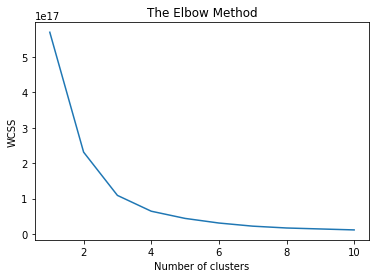

In [27]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## We choose 4 number of clusters from the elbow method

In [14]:
#elbow method
from sklearn.cluster import KMeans
model1=KMeans(n_clusters=4)
model1.fit(X)

KMeans(n_clusters=4)

In [15]:
model1.labels_

array([3, 3, 3, ..., 0, 0, 0])

In [16]:
label=model1.labels_
label

array([3, 3, 3, ..., 0, 0, 0])

In [17]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,label)
score

0.8033037019565128

# The Silhouette score is 0.80, which shows that clusters are away form each other

Text(0, 0.5, 'shooting')

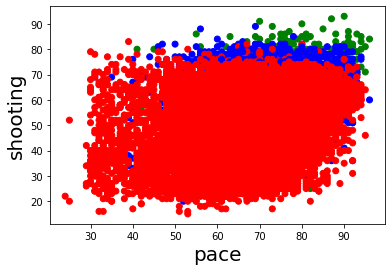

In [43]:
# Visualize the clusters in the original data
plt.scatter(data.pace,data.shooting,color=color_scheme[label])
plt.xlabel('pace',fontsize=20)
plt.ylabel('shooting',fontsize=20)

# Conclusion

# Hence we have successfully grouped the players with their traits and skills 

# The silhoutte score for performance metrics of clustering algorithm is giving us a score of 0.80